## Poject Group 8A
#### Sumanjali Banjara, Sathvik Chava, Sravani Enuganti

# Data Cleaning

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Inline plotting for Jupyter
%matplotlib inline

# Load the dataset
df = pd.read_csv('/Users/sathvikchava/my files/sem3/ADTA 5410 Applications & Deployment of Advanced Analytics/weekly challenge 3/synthetic_hospitality_2025-06-12.csv')

# Preview the dataset
df.head()

,booking_id,booking_datetime,checkin_date,lead_time_days,stay_nights,num_rooms,num_adults,num_children,customer_age,loyalty_points,...,seasonal_index,market_segment,channel,room_type,meal_plan,customer_tier,country_code,weekend_flag,target_class,target_value
0,1,2024-10-31 11:33:20.011658192,2025-03-23,143.0,3,1,2,1,57.0,201.4,...,0.85,Group,OTA,Presidential,BB,Silver,DE,Yes,Cancelled,298.96
1,2,2025-04-10 19:44:52.795617342,2026-01-07,272.0,5,1,1,1,37.0,472.1,...,0.70,Leisure,OTA,Standard,BB,Silver,CA,No,Completed,321.40
2,3,2023-05-14 05:56:20.176139593,2023-06-28,45.0,2,1,1,1,47.0,3310.8,...,1.20,Leisure,Corporate,Executive,BB,Bronze,ZA,No,Cancelled,369.04
3,4,2023-09-29 17:05:22.838150501,2024-07-17,292.0,1,1,2,1,44.0,545.3,...,1.35,Group,Corporate,Executive,HB,Gold,JP,No,Completed,149.92
4,5,2025-03-02 00:07:13.410190582,2025-05-17,76.0,1,1,2,1,63.0,255.6,...,1.00,Corporate,OTA,Standard,HB,Bronze,US,Yes,NoShow,52.83


In [3]:
# Converting potential datetime columns if not automatically parsed
for col in df.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        try:
            df[col] = pd.to_datetime(df[col])
        except Exception:
            pass  # Skip if not parsable

# Initializing
categorical_cols = []
numerical_cols = []
datetime_cols = []

# Classifying columns
for col in df.columns:
    dtype = df[col].dtype

    if pd.api.types.is_datetime64_any_dtype(df[col]):
        datetime_cols.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
        # Treating low-cardinality numeric columns as categorical (e.g., 0/1 or codes)
        if df[col].nunique() < 10:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    else:
        categorical_cols.append(col)

# Print results
print("\n Categorical Columns:")
for col in categorical_cols:
    print(f" - {col}")

print("\n Numerical Columns:")
for col in numerical_cols:
    print(f" - {col}")

print("\n Datetime Columns:")
for col in datetime_cols:
    print(f" - {col}")


 Categorical Columns:
 - num_rooms
 - num_adults
 - num_children
 - discount_pct
 - market_segment
 - channel
 - room_type
 - meal_plan
 - customer_tier
 - country_code
 - weekend_flag
 - target_class

 Numerical Columns:
 - booking_id
 - stay_nights
 - customer_age
 - loyalty_points
 - avg_daily_rate
 - distance_to_airport_km
 - competitor_rate
 - marketing_score
 - seasonal_index
 - target_value

 Datetime Columns:
 - booking_datetime
 - checkin_date
 - lead_time_days


In [4]:
# Create summary of missing values
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ['Variable', 'Missing_Values']
missing_summary['Missing_Percentage'] = (missing_summary['Missing_Values'] / len(df)) * 100

# Display missing value summary
print("Missing Values Summary:")
missing_summary

Missing Values Summary:


,Variable,Missing_Values,Missing_Percentage
0,booking_id,0,0.0000
1,booking_datetime,0,0.0000
2,checkin_date,0,0.0000
3,lead_time_days,4048,2.0240
4,stay_nights,0,0.0000
5,num_rooms,0,0.0000
6,num_adults,0,0.0000
7,num_children,0,0.0000
8,customer_age,4004,2.0020
9,loyalty_points,4023,2.0115


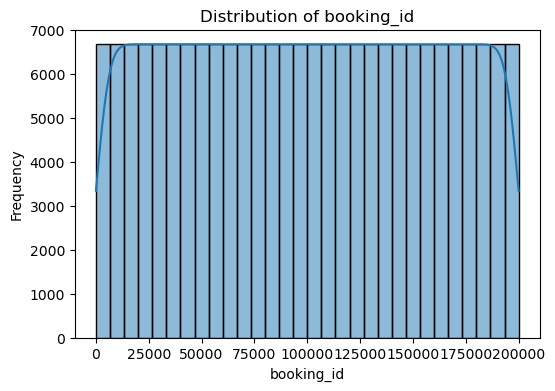

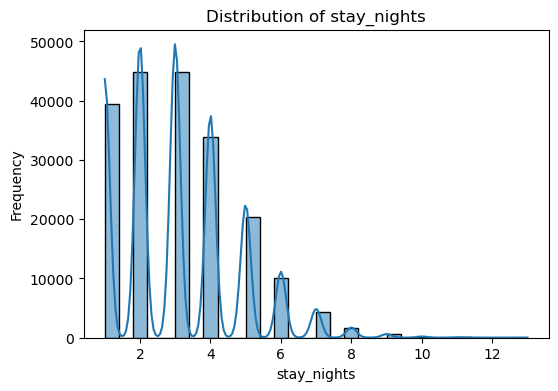

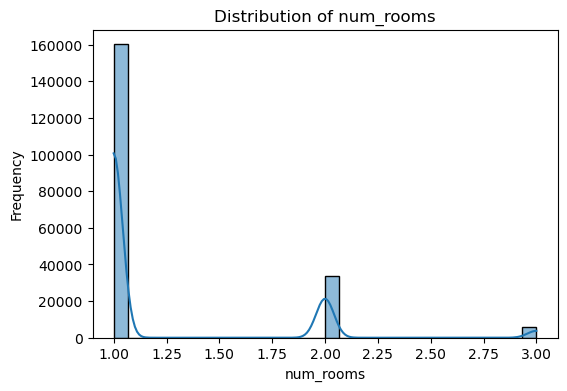

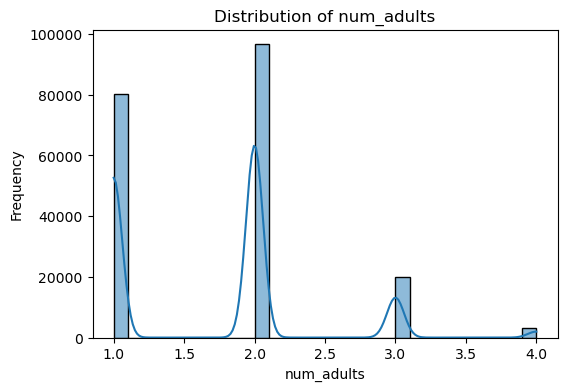

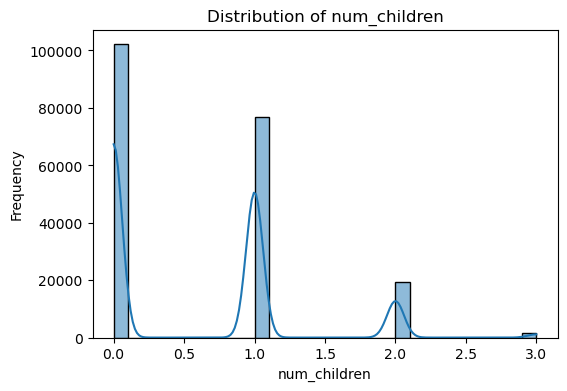

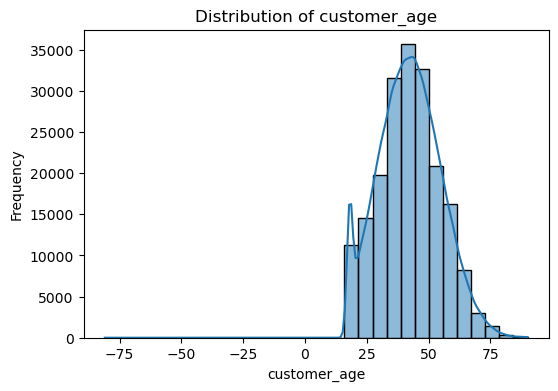

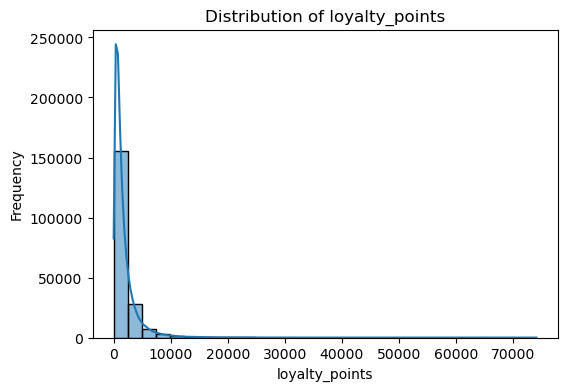

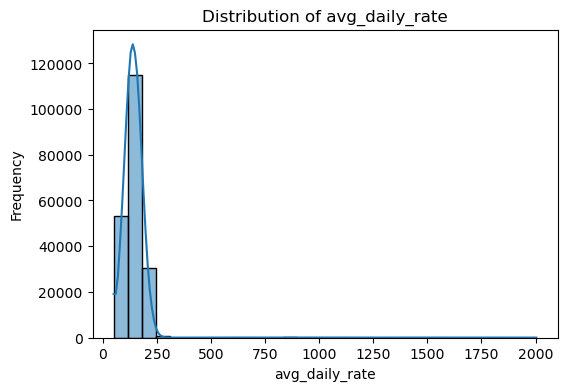

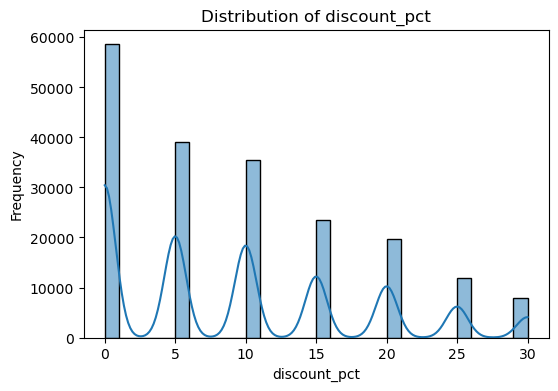

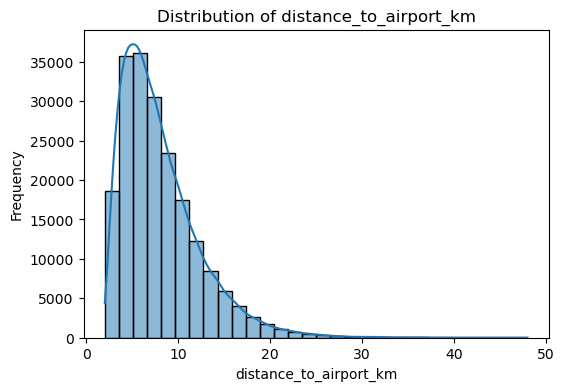

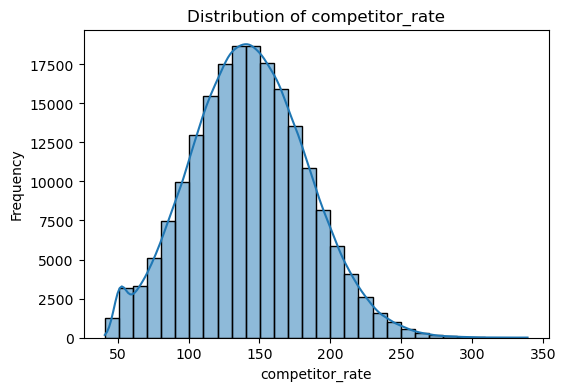

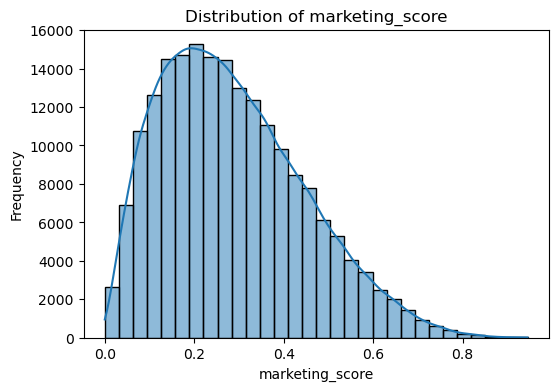

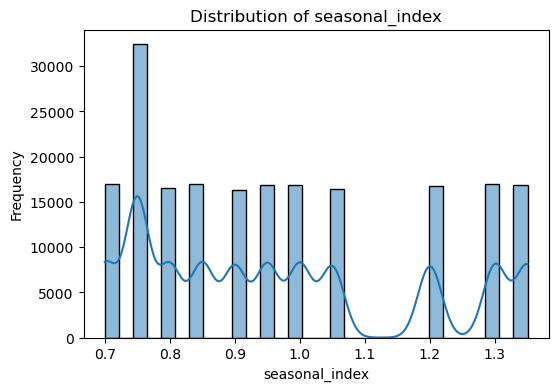

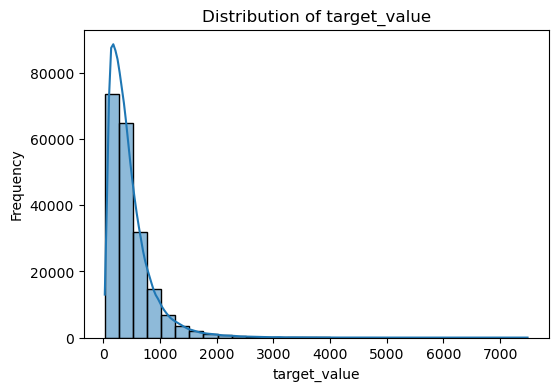

In [5]:
# Select numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot distributions to identify skew and outliers
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [6]:
# Compare mean and median for columns with missing values
for col in num_cols:
    if df[col].isnull().sum() > 0:
        print(f"\nColumn: {col}")
        print(f"Mean: {df[col].mean():.2f}")
        print(f"Median: {df[col].median():.2f}")


Column: customer_age
Mean: 42.16
Median: 42.00

Column: loyalty_points
Mean: 1805.41
Median: 1090.80

Column: discount_pct
Mean: 9.34
Median: 10.00

Column: competitor_rate
Mean: 142.57
Median: 141.93

Column: marketing_score
Mean: 0.29
Median: 0.27


In [7]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Show mode values and counts for columns with missing values
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        print(f"\nColumn: {col}")
        print(df[col].value_counts().head())
        print(f"Mode: {df[col].mode()[0]}")

In [8]:
# Handle missing values
#   - For numerical columns (int64 or float64):
#       → Missing values are imputed using the column's median.

#   - For categorical columns (typically object or string types):
#       → Missing values are filled using the most frequent value (mode).

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            # Use median for numerical columns
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
        else:
            # Use mode for categorical columns
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)


/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_29871/4250651611.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_29871/4250651611.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [9]:
# Final check to confirm all missing values are filled
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
booking_id                0
booking_datetime          0
checkin_date              0
lead_time_days            0
stay_nights               0
num_rooms                 0
num_adults                0
num_children              0
customer_age              0
loyalty_points            0
avg_daily_rate            0
discount_pct              0
distance_to_airport_km    0
competitor_rate           0
marketing_score           0
seasonal_index            0
market_segment            0
channel                   0
room_type                 0
meal_plan                 0
customer_tier             0
country_code              0
weekend_flag              0
target_class              0
target_value              0
dtype: int64


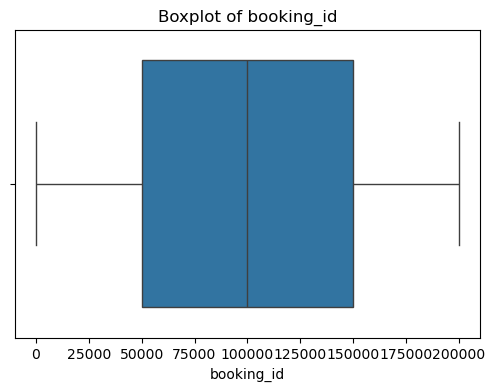

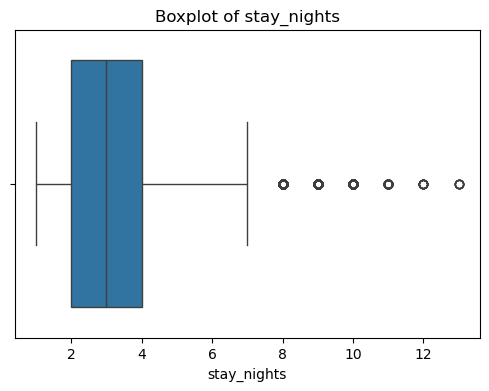

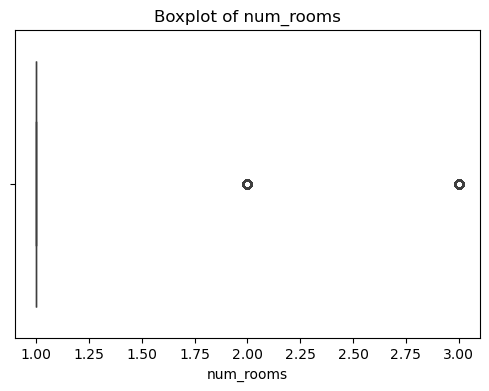

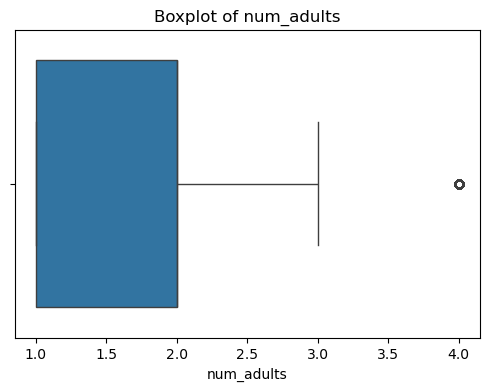

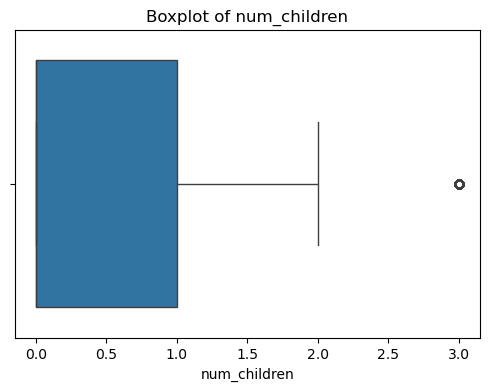

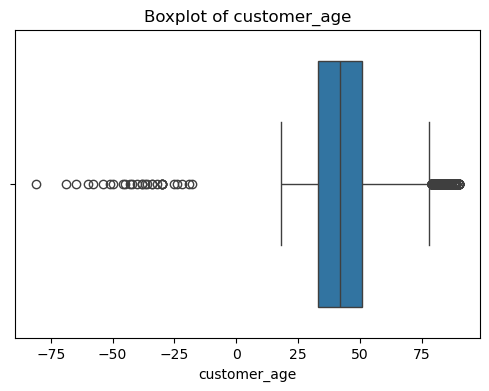

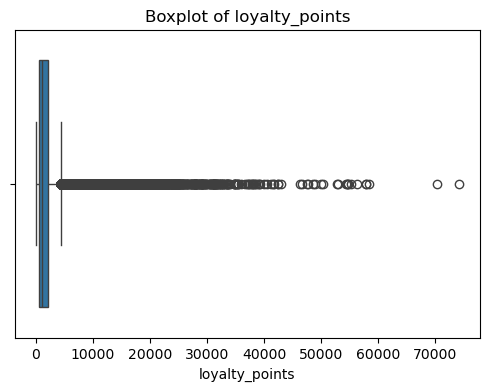

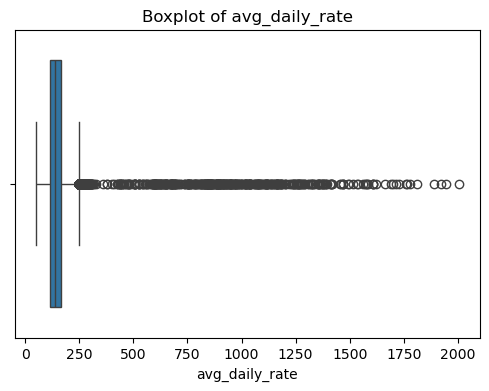

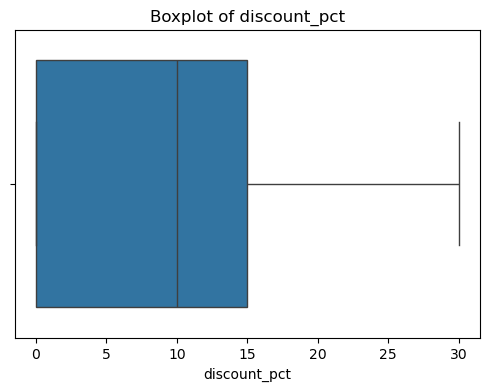

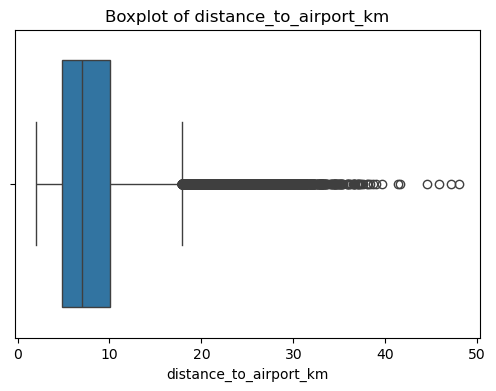

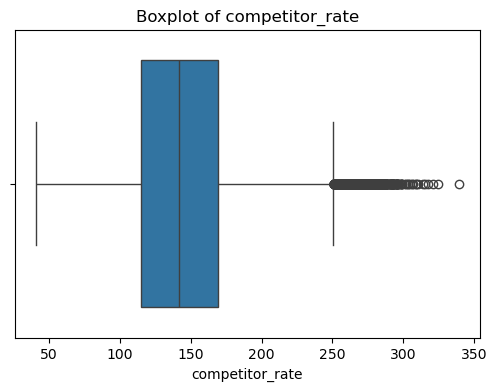

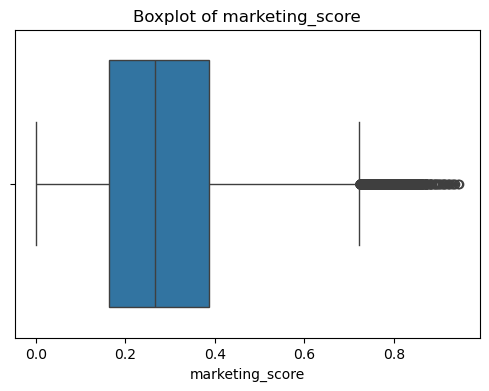

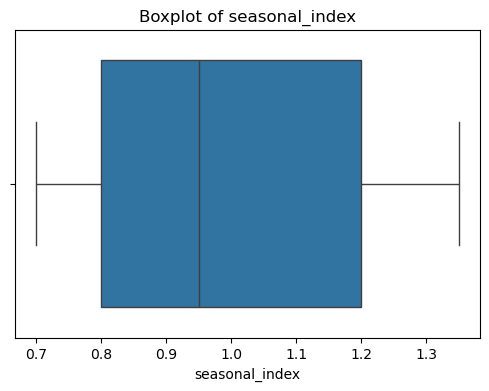

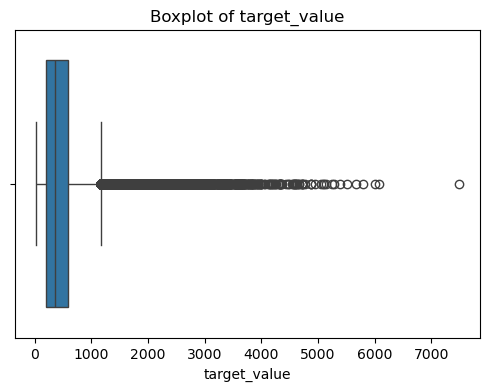

In [10]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots to visually inspect outliers
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [11]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Dictionary to store outlier counts
outlier_counts = {}

# Count outliers for each numeric column
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

# Display outlier summary
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier_Count'])
outlier_counts_df.sort_values(by='Outlier_Count', ascending=False)


,Column,Outlier_Count
2,num_rooms,39854
6,loyalty_points,15854
13,target_value,10449
9,distance_to_airport_km,6319
3,num_adults,3007
1,stay_nights,2302
4,num_children,1706
11,marketing_score,1447
7,avg_daily_rate,1082
10,competitor_rate,1055


In [12]:
from scipy.stats import zscore

# Compute Z-scores
z_scores = df[numeric_cols].apply(zscore)

# Count outliers using z-score (threshold ±3)
z_outlier_counts = (z_scores.abs() > 3).sum()

# Compare with IQR method
comparison_df = pd.DataFrame({
    'Column': numeric_cols,
    'IQR_Outliers': outlier_counts_df.set_index('Column')['Outlier_Count'],
    'Z_Score_Outliers': z_outlier_counts
}).reset_index(drop=True)

comparison_df

,Column,IQR_Outliers,Z_Score_Outliers
0,booking_id,0,0
1,stay_nights,2302,762
2,num_rooms,39854,5964
3,num_adults,3007,3007
4,num_children,1706,1706
5,customer_age,512,416
6,loyalty_points,15854,3632
7,avg_daily_rate,1082,401
8,discount_pct,0,0
9,distance_to_airport_km,6319,2824


In [13]:
# List of numeric columns with outliers that we want to cap
columns_to_cap = [

    'loyalty_points',
    'target_value',
    'distance_to_airport_km',
    'num_adults',
    'stay_nights',
    'num_children',
    'marketing_score',
    'avg_daily_rate',
    'competitor_rate',
    'customer_age'
]

# Re-use the same capping function
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower, upper)

# Apply capping to selected columns
for col in columns_to_cap:
    cap_outliers_iqr(df, col)


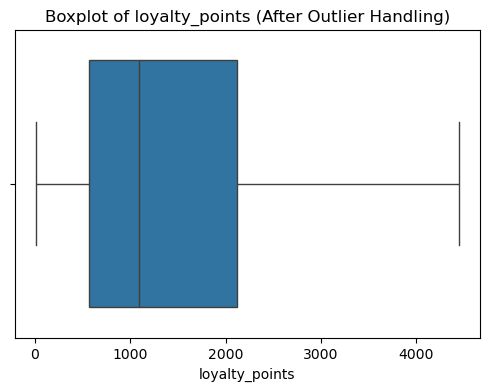

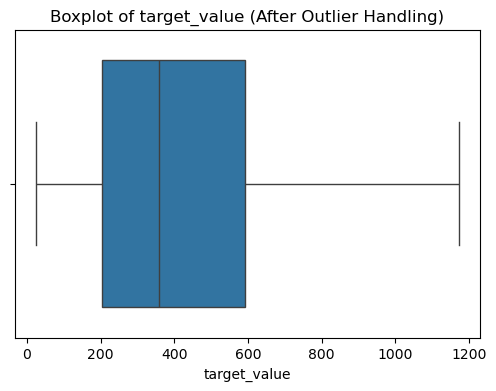

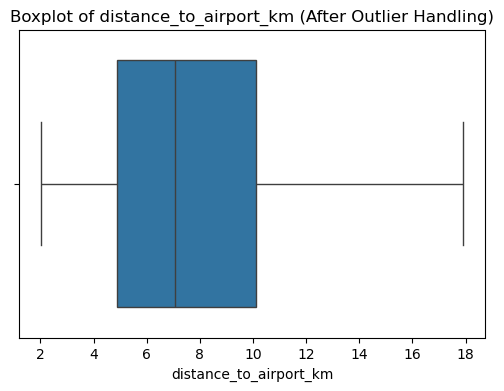

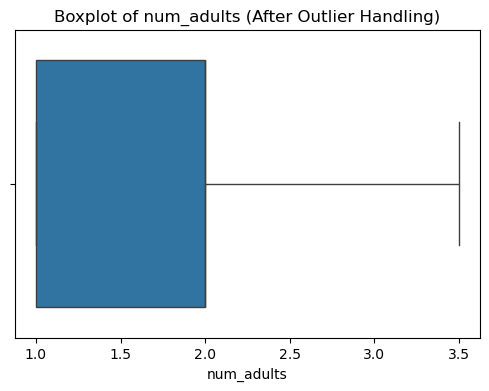

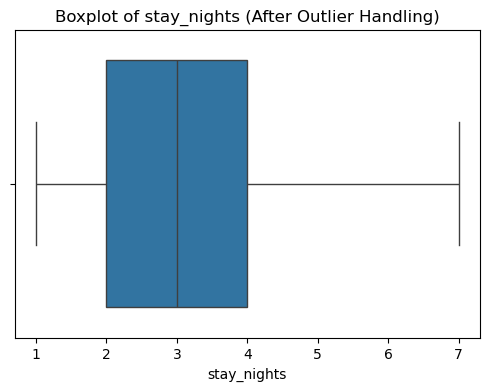

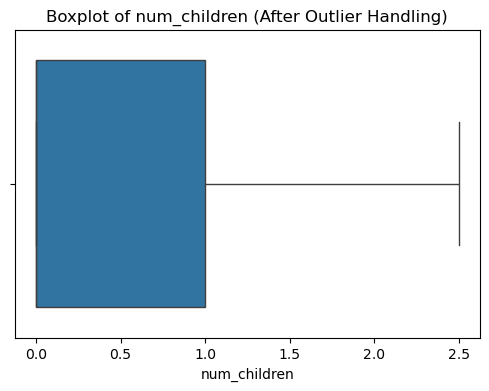

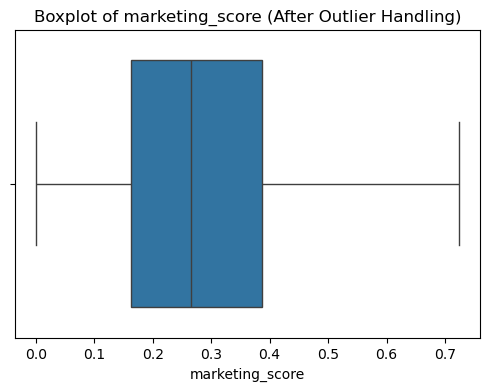

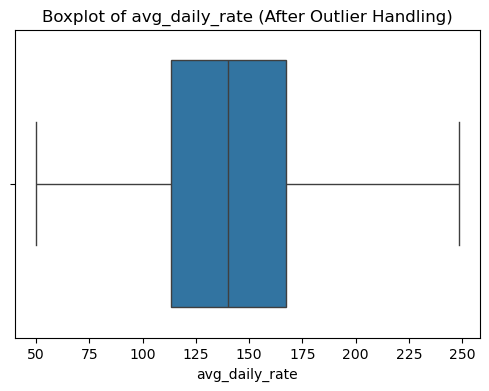

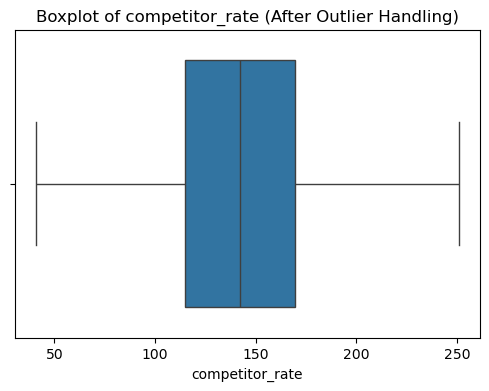

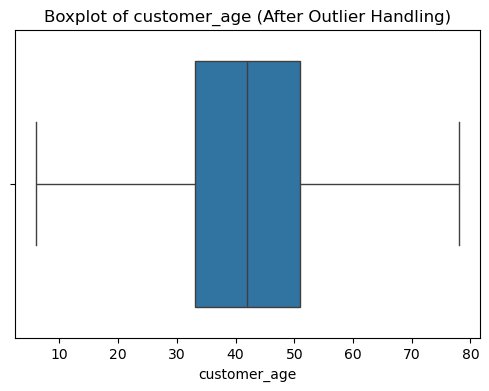

In [14]:
# Replot boxplots to confirm outliers have been handled
for col in columns_to_cap:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Outlier Handling)')
    plt.xlabel(col)
    plt.show()

In [15]:
# Recalculate outliers after capping to verify improvement
post_cap_outlier_counts = {}

for col in columns_to_cap:
    outliers = detect_outliers_iqr(df, col)
    post_cap_outlier_counts[col] = len(outliers)

# Create DataFrame to compare before vs after
outlier_comparison = pd.DataFrame({
    'Column': columns_to_cap,
    'Before_Capping': [outlier_counts[col] for col in columns_to_cap],
    'After_Capping': [post_cap_outlier_counts[col] for col in columns_to_cap]
})

outlier_comparison['Reduction (%)'] = (
    100 * (outlier_comparison['Before_Capping'] - outlier_comparison['After_Capping']) / 
    outlier_comparison['Before_Capping']
).round(2)

# Display the comparison table
outlier_comparison.sort_values(by='Before_Capping', ascending=False)


,Column,Before_Capping,After_Capping,Reduction (%)
0,loyalty_points,15854,0,100.0
1,target_value,10449,0,100.0
2,distance_to_airport_km,6319,0,100.0
3,num_adults,3007,0,100.0
4,stay_nights,2302,0,100.0
5,num_children,1706,0,100.0
6,marketing_score,1447,0,100.0
7,avg_daily_rate,1082,0,100.0
8,competitor_rate,1055,0,100.0
9,customer_age,512,0,100.0


In [16]:
# Downloading the cleaned data.
df.to_csv("cleaned_data.csv", index=False)

# Exploratory Data Analysis (EDA)

In [18]:
# Display the column names and their data types
print("Column Data Types:\n")
print(df.dtypes)

Column Data Types:

booking_id                         int64
booking_datetime          datetime64[ns]
checkin_date              datetime64[ns]
lead_time_days            datetime64[ns]
stay_nights                        int64
num_rooms                          int64
num_adults                       float64
num_children                     float64
customer_age                     float64
loyalty_points                   float64
avg_daily_rate                   float64
discount_pct                     float64
distance_to_airport_km           float64
competitor_rate                  float64
marketing_score                  float64
seasonal_index                   float64
market_segment                    object
channel                           object
room_type                         object
meal_plan                         object
customer_tier                     object
country_code                      object
weekend_flag                      object
target_class                      obj

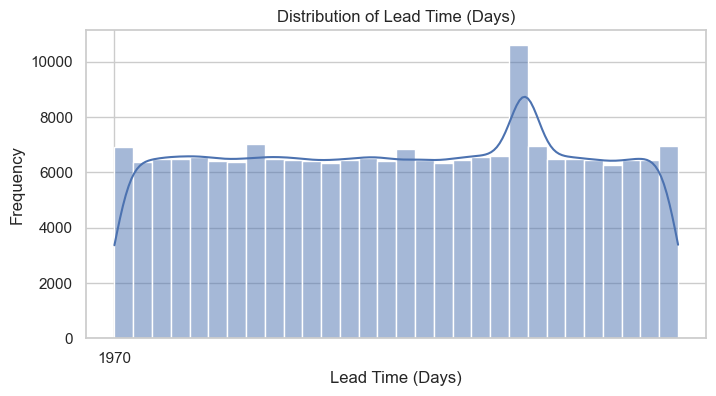

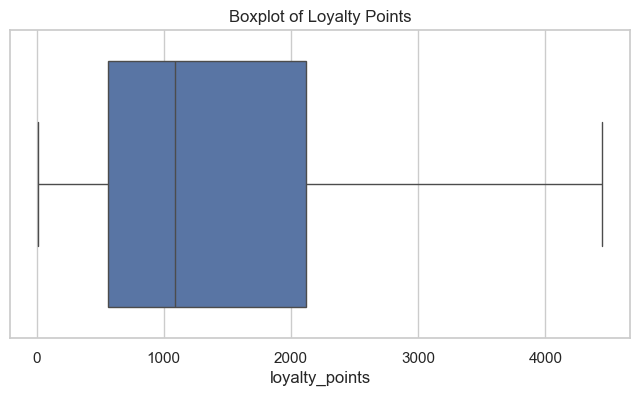

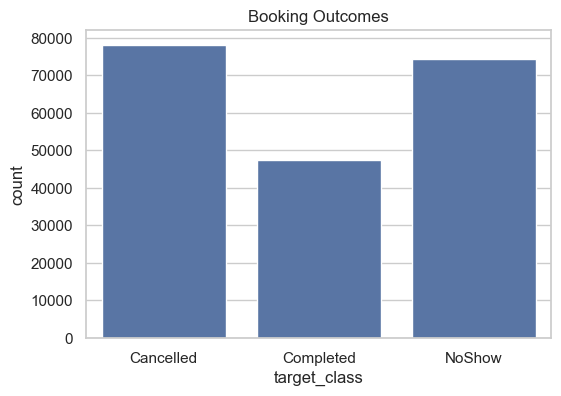

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')

# Univariate histogram - lead_time_days
plt.figure(figsize=(8, 4))
sns.histplot(df['lead_time_days'], bins=30, kde=True)
plt.title('Distribution of Lead Time (Days)')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()
# Univariate boxplot - loyalty_points
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['loyalty_points'])
plt.title('Boxplot of Loyalty Points')
plt.show()

# Bar plot - target_class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target_class', data=df)
plt.title('Booking Outcomes')
plt.show()


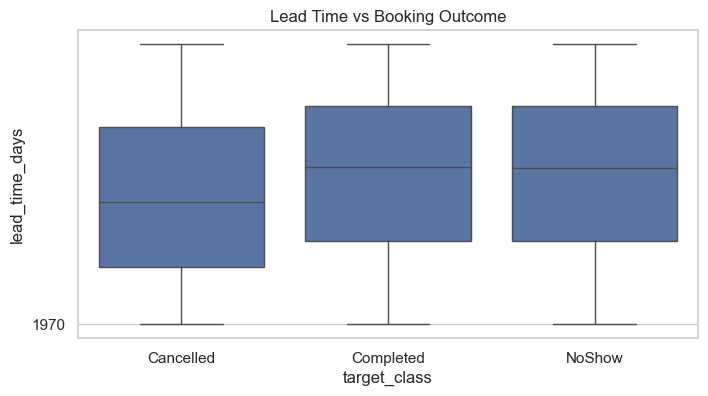

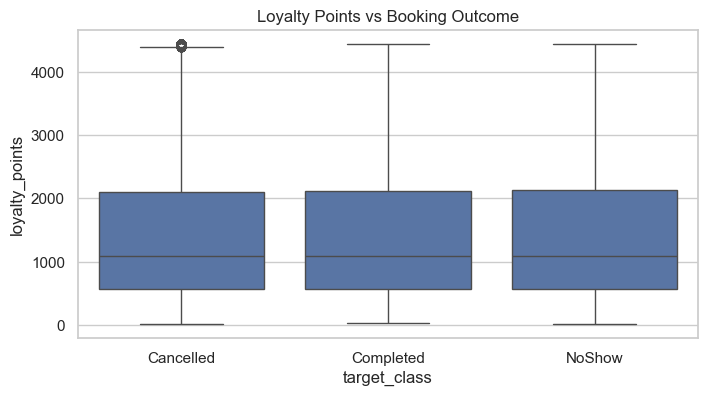

In [20]:
# Boxplot: Lead time vs target_class
plt.figure(figsize=(8, 4))
sns.boxplot(x='target_class', y='lead_time_days', data=df)
plt.title('Lead Time vs Booking Outcome')
plt.show()

# Boxplot: Loyalty points vs target_class
plt.figure(figsize=(8, 4))
sns.boxplot(x='target_class', y='loyalty_points', data=df)
plt.title('Loyalty Points vs Booking Outcome')
plt.show()

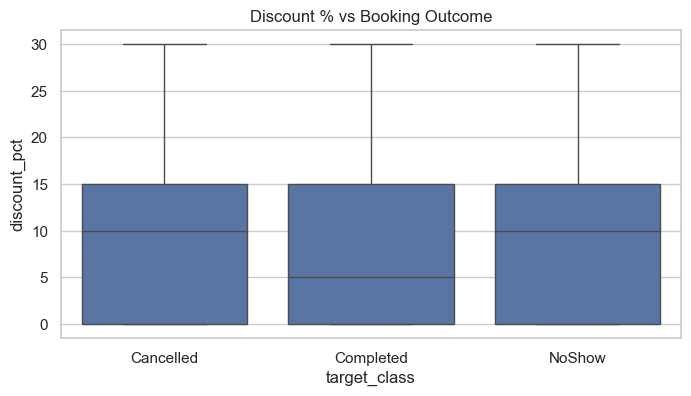

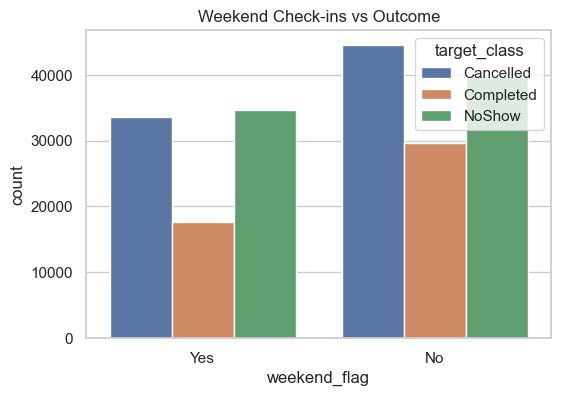

In [21]:
# Boxplot: Discount vs target_class
plt.figure(figsize=(8, 4))
sns.boxplot(x='target_class', y='discount_pct', data=df)
plt.title('Discount % vs Booking Outcome')
plt.show()

# Barplot: Weekend flag vs booking outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='weekend_flag', hue='target_class', data=df)
plt.title('Weekend Check-ins vs Outcome')
plt.show()

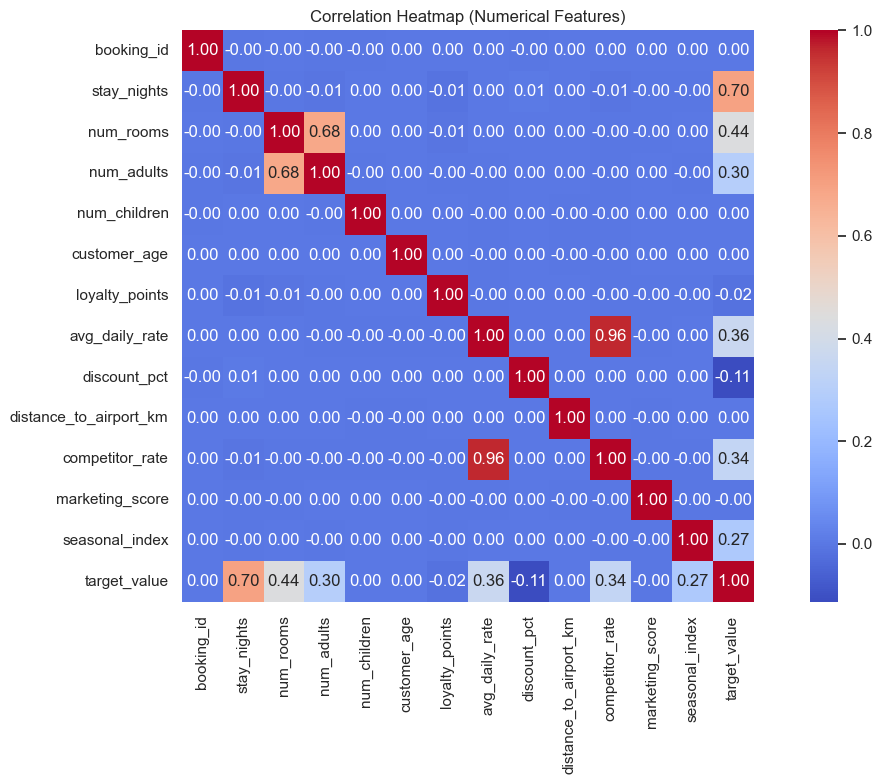

In [22]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap (Numerical Features)')
plt.tight_layout()
plt.show()


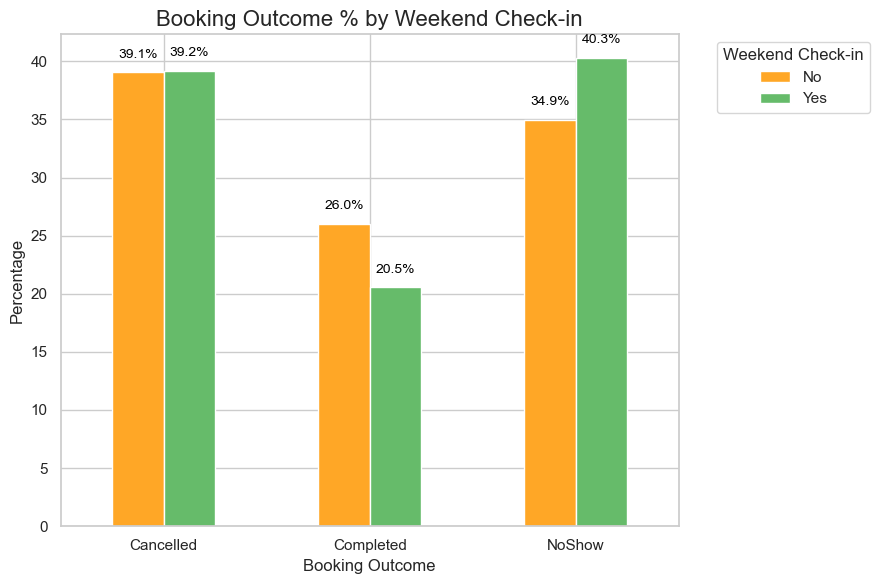

In [23]:


# Calculate normalized outcome % for weekend vs weekday
normalized = pd.crosstab(df['weekend_flag'], df['target_class'], normalize='index') * 100
normalized = normalized.transpose()

# Custom color palette
custom_colors = {
    'Cancelled': '#FFA726',   # orange
    'Completed': '#66BB6A',   # green
    'NoShow': '#EF5350'       # red
}
bar_colors = [custom_colors[outcome] for outcome in normalized.index]

# Plot
fig, ax = plt.subplots(figsize=(9, 6))
bars = normalized.plot(kind='bar', ax=ax, color=bar_colors)

# Titles and labels
plt.title('Booking Outcome % by Weekend Check-in', fontsize=16)
plt.xlabel('Booking Outcome', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    if height > 3:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height + 1),
                    ha='center', va='bottom', fontsize=10, color='black')

# Custom legend
plt.legend(title='Weekend Check-in', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


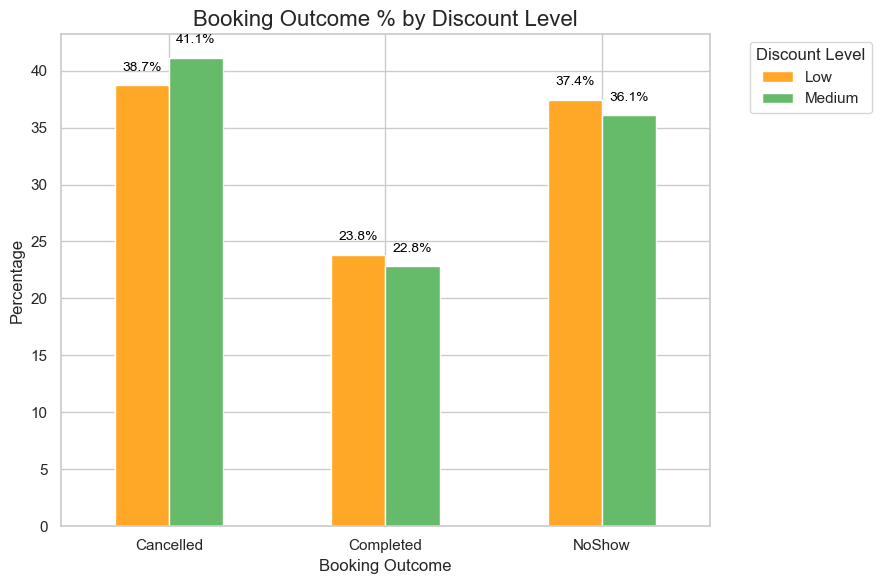

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Categorize discount percentages
df['discount_level'] = pd.cut(df['discount_pct'], bins=[0, 10, 30, 100], labels=['Low', 'Medium', 'High'])

# Calculate normalized outcome % for each discount level
normalized = pd.crosstab(df['discount_level'], df['target_class'], normalize='index') * 100
normalized = normalized.transpose()

# Custom color palette (semantic)
custom_colors = {
    'Cancelled': '#FFA726',   # orange
    'Completed': '#66BB6A',   # green
    'NoShow': '#EF5350'       # red
}
bar_colors = [custom_colors[outcome] for outcome in normalized.index]

# Plot
fig, ax = plt.subplots(figsize=(9, 6))
bars = normalized.plot(kind='bar', ax=ax, color=bar_colors)

# Titles and labels
plt.title('Booking Outcome % by Discount Level', fontsize=16)
plt.xlabel('Booking Outcome', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on each bar segment
for p in ax.patches:
    height = p.get_height()
    if height > 3:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height + 1),
                    ha='center', va='bottom', fontsize=10, color='black')

# Custom legend
plt.legend(title='Discount Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


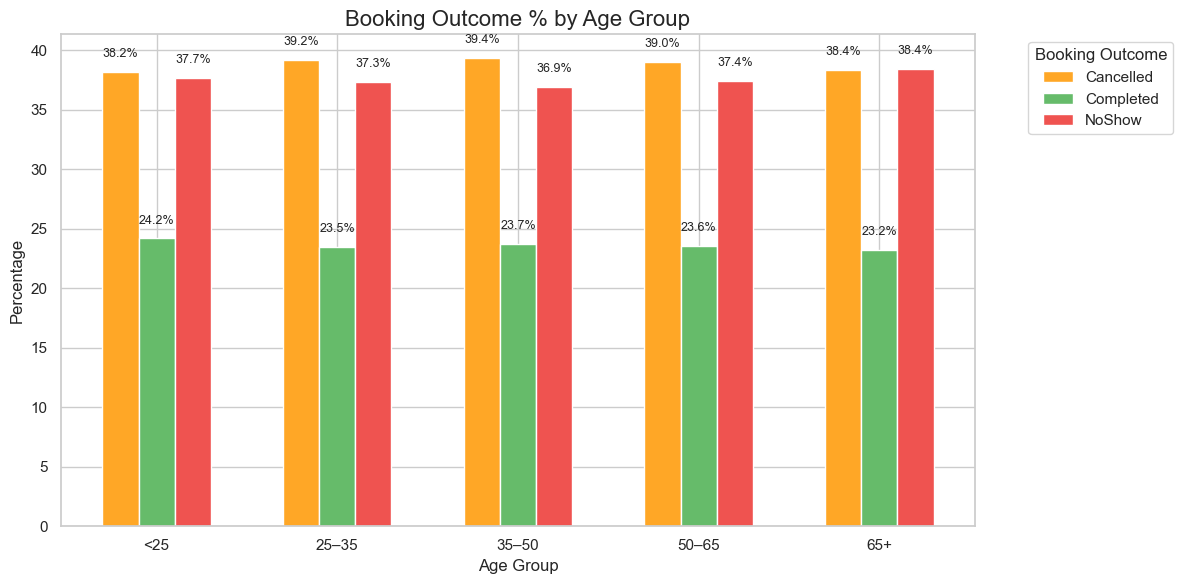

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Bin customer ages into age groups
df['age_group'] = pd.cut(df['customer_age'], bins=[0, 25, 35, 50, 65, 100],
                         labels=['<25', '25–35', '35–50', '50–65', '65+'])

# Create normalized % outcome per age group
normalized = pd.crosstab(df['age_group'], df['target_class'], normalize='index') * 100

# Setup
age_groups = normalized.index
outcomes = normalized.columns
bar_width = 0.2
x = np.arange(len(age_groups))

# Semantic colors
custom_colors = {
    'Cancelled': '#FFA726',
    'Completed': '#66BB6A',
    'NoShow': '#EF5350'
}

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, outcome in enumerate(outcomes):
    values = normalized[outcome]
    ax.bar(x + i * bar_width, values, width=bar_width, label=outcome, color=custom_colors[outcome])

    # Add % labels
    for xi, val in zip(x, values):
        if val > 3:
            ax.text(xi + i * bar_width, val + 1, f'{val:.1f}%',
                    ha='center', va='bottom', fontsize=9)

# Axes and titles
ax.set_title('Booking Outcome % by Age Group', fontsize=16)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(age_groups)
ax.legend(title='Booking Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Modeling and Evaluation

In [27]:
df = pd.read_csv('/Users/sathvikchava/my files/sem3/ADTA 5410 Applications & Deployment of Advanced Analytics/weekly challenge 4/cleaned_data3.csv')
df.head()

,booking_id,booking_datetime,checkin_date,lead_time_days,stay_nights,num_rooms,num_adults,num_children,customer_age,loyalty_points,...,seasonal_index,market_segment,channel,room_type,meal_plan,customer_tier,country_code,weekend_flag,target_class,target_value
0,1,2024-10-31 11:33:20.011658192,2025-03-23,143.0,3,1,2.0,1.0,57.0,201.4,...,0.85,Group,OTA,Presidential,BB,Silver,DE,Yes,Cancelled,298.96
1,2,2025-04-10 19:44:52.795617342,2026-01-07,272.0,5,1,1.0,1.0,37.0,472.1,...,0.70,Leisure,OTA,Standard,BB,Silver,CA,No,Completed,321.40
2,3,2023-05-14 05:56:20.176139593,2023-06-28,45.0,2,1,1.0,1.0,47.0,3310.8,...,1.20,Leisure,Corporate,Executive,BB,Bronze,ZA,No,Cancelled,369.04
3,4,2023-09-29 17:05:22.838150501,2024-07-17,292.0,1,1,2.0,1.0,44.0,545.3,...,1.35,Group,Corporate,Executive,HB,Gold,JP,No,Completed,149.92
4,5,2025-03-02 00:07:13.410190582,2025-05-17,76.0,1,1,2.0,1.0,63.0,255.6,...,1.00,Corporate,OTA,Standard,HB,Bronze,US,Yes,NoShow,52.83


In [28]:
# === 1. Import Libraries ===
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [29]:
# === 3. Convert Date Columns ===
df['booking_datetime'] = pd.to_datetime(df['booking_datetime'])
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

In [30]:
# === 4.1: Basic Structure and Data Types ===
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)


Shape of dataset: (200000, 25)

Data types:
 booking_id                         int64
booking_datetime          datetime64[ns]
checkin_date              datetime64[ns]
lead_time_days                   float64
stay_nights                        int64
num_rooms                          int64
num_adults                       float64
num_children                     float64
customer_age                     float64
loyalty_points                   float64
avg_daily_rate                   float64
discount_pct                     float64
distance_to_airport_km           float64
competitor_rate                  float64
marketing_score                  float64
seasonal_index                   float64
market_segment                    object
channel                           object
room_type                         object
meal_plan                         object
customer_tier                     object
country_code                      object
weekend_flag                      object
target_class

In [31]:
# === 4.2: Check for Missing Values ===
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage


In [32]:
# === 4.3: Class Distribution in target_class ===
class_counts = df['target_class'].value_counts()
class_percent = df['target_class'].value_counts(normalize=True) * 100
class_df = pd.DataFrame({'Count': class_counts, 'Percentage': class_percent})
print(class_df)

              Count  Percentage
target_class                   
Cancelled     78192      39.096
NoShow        74482      37.241
Completed     47326      23.663


In [33]:
# === 4.4: Descriptive Statistics (Numerical Features) ===
df.describe()


,booking_id,booking_datetime,checkin_date,lead_time_days,stay_nights,num_rooms,num_adults,num_children,customer_age,loyalty_points,avg_daily_rate,discount_pct,distance_to_airport_km,competitor_rate,marketing_score,seasonal_index,target_value
count,200000.000000,200000,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,2024-03-21 02:22:43.212151808,2024-09-18 13:58:01.343999744,182.056890,3.039175,1.229090,1.721488,0.598485,42.157350,1532.605918,140.411015,9.352500,7.909163,142.483930,0.285395,0.968123,437.561279
min,1.000000,2023-01-01 00:18:01.769617796,2023-01-01 00:00:00,0.000000,1.000000,1.000000,1.000000,0.000000,6.000000,12.900000,50.000000,0.000000,2.010000,40.840000,0.000000,0.700000,24.380000
25%,50000.750000,2023-08-10 15:31:51.636883456,2024-02-09 00:00:00,93.000000,2.000000,1.000000,1.000000,0.000000,33.000000,565.500000,113.157500,0.000000,4.890000,115.030000,0.163000,0.800000,204.050000
50%,100000.500000,2024-03-20 19:06:59.874753792,2024-09-18 00:00:00,182.000000,3.000000,1.000000,2.000000,0.000000,42.000000,1090.800000,139.970000,10.000000,7.050000,141.930000,0.265000,0.950000,358.590000
75%,150000.250000,2024-10-29 09:02:52.663953664,2025-04-30 00:00:00,271.000000,4.000000,1.000000,2.000000,1.000000,51.000000,2117.200000,167.260000,15.000000,10.100000,169.350000,0.387250,1.200000,591.172500
max,200000.000000,2025-06-09 23:43:39.862185240,2026-06-08 00:00:00,364.000000,7.000000,3.000000,3.500000,2.500000,78.000000,4444.750000,248.413750,30.000000,17.915000,250.830000,0.723625,1.350000,1171.856250
std,57735.171256,NaN,NaN,104.224588,1.604192,0.486054,0.676843,0.682159,12.506074,1272.552504,39.660829,8.701128,3.891515,40.272104,0.157380,0.210977,300.579508


In [34]:
# === 4.5: Descriptive Statistics (Categorical Features) ===
df.select_dtypes(include='object').describe()


,market_segment,channel,room_type,meal_plan,customer_tier,country_code,weekend_flag,target_class
count,200000,200000,200000,200000,200000,200000,200000,200000
unique,5,4,8,4,4,30,2,3
top,Other,OTA,Executive,BB,Bronze,DK,No,Cancelled
freq,40278,90142,25214,120052,103346,6813,114149,78192


## Feature Engineering 

In [36]:
# === Booking Value ===
# This estimates the monetary value of a booking by combining number of rooms, nights, rate, and discount.
# Hypothesis: High-value bookings may be less likely to cancel, or may show different patterns compared to low-value ones.
# This helps the model weigh risk differently for high vs. low revenue bookings.
df['booking_value'] = df['stay_nights'] * df['num_rooms'] * df['avg_daily_rate'] * (1 - df['discount_pct'] / 100)

# === Rate Competitiveness ===
# Measures how much more (or less) expensive the hotel's rate is compared to competitors on the same date.
# Hypothesis: If the hotel is priced too high, customers may cancel in favor of cheaper options.
# Helps the model detect competitive pricing effects on cancellation/no-show likelihood.
df['rate_competitiveness'] = df['avg_daily_rate'] - df['competitor_rate']

# === Discount Level Category ===
# Converts continuous discount % into categorical bins: low, medium, high.
# Hypothesis: Customers receiving large discounts may be more likely to cancel due to lower commitment.
# Simplifies the model’s interpretation of discount behavior while preserving key patterns.
df['discount_level'] = pd.cut(df['discount_pct'], bins=[-1, 5, 15, 100], labels=['low', 'medium', 'high'])



# === Age Group ===
# Bins customer age into general demographic brackets.
# Hypothesis: Different age groups may show different levels of booking reliability.
# This helps the model generalize behavior patterns across broad age ranges.
df['age_group'] = pd.cut(df['customer_age'], bins=[0, 25, 40, 60, 100], labels=['young', 'adult', 'middle_aged', 'senior'])

# === Loyalty Score Tier ===
# Converts loyalty points into tiered categories (low, medium, high).
# Hypothesis: Guests with high loyalty points are more committed and less likely to cancel/no-show.
# Adds explainable granularity that captures loyalty-based behavior without overfitting to raw point values.
df['loyalty_score_tier'] = pd.cut(df['loyalty_points'], bins=[-1, 1000, 10000, np.inf], labels=['low', 'medium', 'high'])

# === Holiday Season Flag ===
# Extracts month from check-in date and marks June, July, and December as peak travel seasons.
# Hypothesis: Cancellations or no-shows may spike due to overbooking or travel disruptions in these months.
# Helps capture seasonal variation in booking reliability.
df['month'] = df['checkin_date'].dt.month
df['is_holiday_season'] = df['month'].isin([6, 7, 12]).astype(int)

# === Weekend Flag as Binary ===
# Converts 'Yes'/'No' weekend check-in flag to binary 1/0.
# Hypothesis: Bookings on weekends may be more impulsive or casual, increasing no-show risk.
# Makes this feature usable in ML models that require numerical input.
df['weekend_flag'] = df['weekend_flag'].map({'Yes': 1, 'No': 0})

# === Total Guests ===
# Adds adult and child guests to get total party size.
# Hypothesis: Larger parties may have more structured plans and be less likely to cancel or no-show.
# Gives the model insight into the scale of each reservation.
df['total_guests'] = df['num_adults'] + df['num_children']

# === Check-in Weekday ===
# Extracts day of the week from check-in date (0 = Monday, ..., 6 = Sunday)
# Hypothesis: Weekday check-ins might reflect business travel; weekend check-ins may reflect leisure.
# Helps model capture day-of-week behavior patterns.
df['checkin_weekday'] = df['checkin_date'].dt.weekday
# === Booking Month ===
# Extracts the month of the booking (not check-in) to capture booking seasonality.
# Hypothesis: Booking behavior can vary by month due to promotions, holidays, etc.
# Enables learning of seasonal booking patterns.
df['booking_month'] = df['booking_datetime'].dt.month


In [37]:
# === Label Encode Categorical Variables ===
# Converts string categories into numeric labels for compatibility with ML algorithms.
# Label encoding preserves ordinal relationships where appropriate.
from sklearn.preprocessing import LabelEncoder

cat_cols = ['market_segment', 'channel', 'room_type', 'meal_plan',
            'customer_tier', 'country_code', 'discount_level',
             'age_group', 'loyalty_score_tier']

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save encoder for possible inverse transform later
# === Label Encode Target Variable ===
# Converts 'Completed', 'Cancelled', 'NoShow' to numeric labels for classification.
# Required for supervised learning tasks.
df['target_class_encoded'] = LabelEncoder().fit_transform(df['target_class'])


In [38]:
# === Import Required Libraries ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# === Separate Features and Target ===
# We'll drop unused columns and keep the engineered features
X = df.drop(columns=['booking_id', 'booking_datetime', 'checkin_date', 'target_class', 'target_value', 'target_class_encoded'])  # Keep target separately
y = df['target_class_encoded']  # Encoded target: 0 = Cancelled, 1 = Completed, 2 = NoShow

# === Stratified Train-Test Split (80/20) ===
# Stratify ensures class proportions are preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Apply SMOTE to Training Set Only ===
# SMOTE (Synthetic Minority Over-sampling Technique) balances classes by generating synthetic examples of minority classes
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# === Scale Features for Logistic Regression ===
# Logistic Regression is sensitive to feature scales, so we standardize using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)


In [39]:
# Let's check if SMOTE has truly balanced the classes
import pandas as pd
print("Before SMOTE:")
print(y_train.value_counts(normalize=True).rename('proportion'))

print("\nAfter SMOTE:")
print(pd.Series(y_train_bal).value_counts(normalize=True).rename('proportion'))


Before SMOTE:
target_class_encoded
0    0.390956
2    0.372412
1    0.236631
Name: proportion, dtype: float64

After SMOTE:
target_class_encoded
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64


## Logistic Regression

In [41]:
# === Import Logistic Regression and Metrics ===
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Initialize Model ===
# - 'multi_class=multinomial' handles multi-class classification.
# - 'solver=saga' supports multinomial loss + large datasets.
# - 'class_weight=balanced' accounts for any residual imbalance.
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# === Train the Model ===
log_reg.fit(X_train_scaled, y_train_bal)

# === Predict on Test Set ===
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)
# === Initialize Result Tracker ===
model_results = []

# === Classification Report ===
# Includes precision, recall, f1-score per class
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# === Compute Macro Averages ===
macro_f1 = report_dict['macro avg']['f1-score']
macro_precision = report_dict['macro avg']['precision']
macro_recall = report_dict['macro avg']['recall']
accuracy = report_dict['accuracy']

# === Save to Results Dictionary ===
model_results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy,
    'F1 (Macro)': macro_f1,
    'Precision (Macro)': macro_precision,
    'Recall (Macro)': macro_recall
})


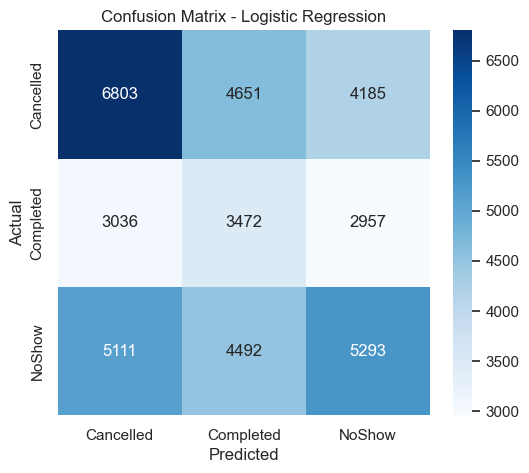

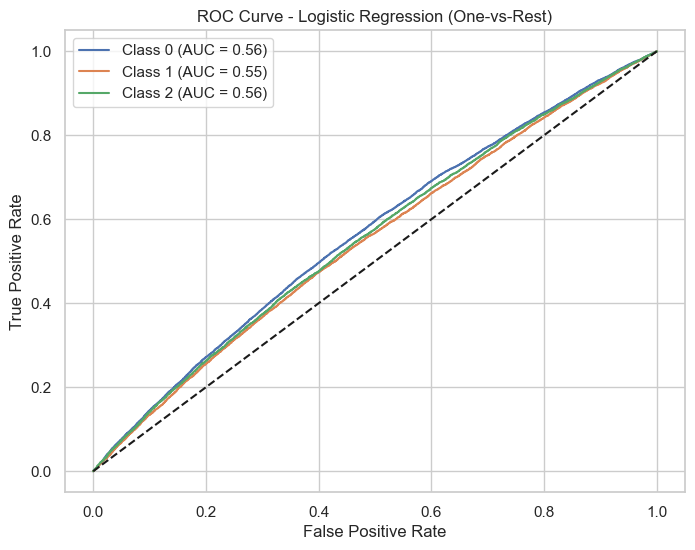

Classification Report - Logistic Regression:



,precision,recall,f1-score,support
0,0.455,0.435,0.445,15639.000
1,0.275,0.367,0.314,9465.000
2,0.426,0.355,0.387,14896.000
accuracy,0.389,0.389,0.389,0.389
macro avg,0.385,0.386,0.382,40000.000
weighted avg,0.402,0.389,0.393,40000.000


In [42]:
# === Confusion Matrix ===
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cancelled', 'Completed', 'NoShow'], yticklabels=['Cancelled', 'Completed', 'NoShow'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# === ROC Curves for Multi-Class ===
# Plot ROC for each class vs rest
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    auc = roc_auc_score(y_test == i, y_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Logistic Regression (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
# === Classification Report Table ===
print("Classification Report - Logistic Regression:\n")
display(report_df.round(3))


## Random Forest Classifier

In [44]:
# === Import Random Forest Classifier ===
from sklearn.ensemble import RandomForestClassifier

# === Initialize Random Forest ===
# - n_estimators = 100: Reasonable number of trees for balance between speed and performance.
# - max_depth = None: Allow full growth to let the model learn patterns.
# - class_weight = 'balanced': Helps mitigate class imbalance.
# - random_state = 42: Ensures reproducibility.
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

# === Train on SMOTE-balanced training set ===
rf_model.fit(X_train_bal, y_train_bal)

# === Predict on test set ===
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)

# === Classification Report ===
from sklearn.metrics import classification_report

report_dict_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_df_rf = pd.DataFrame(report_dict_rf).transpose()

# === Macro-Average Metrics ===
macro_f1_rf = report_dict_rf['macro avg']['f1-score']
macro_precision_rf = report_dict_rf['macro avg']['precision']
macro_recall_rf = report_dict_rf['macro avg']['recall']
accuracy_rf = report_dict_rf['accuracy']

# === Append Results to Performance Tracker ===
model_results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_rf,
    'F1 (Macro)': macro_f1_rf,
    'Precision (Macro)': macro_precision_rf,
    'Recall (Macro)': macro_recall_rf
})


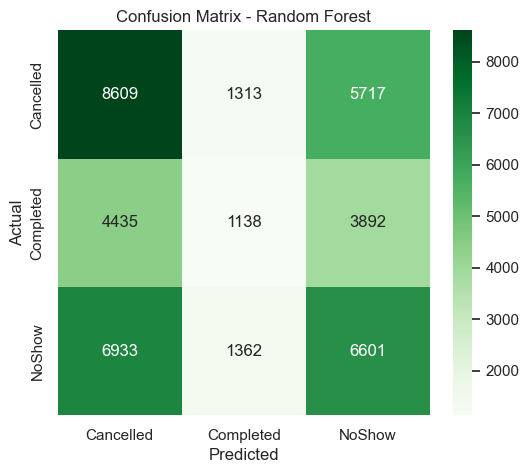

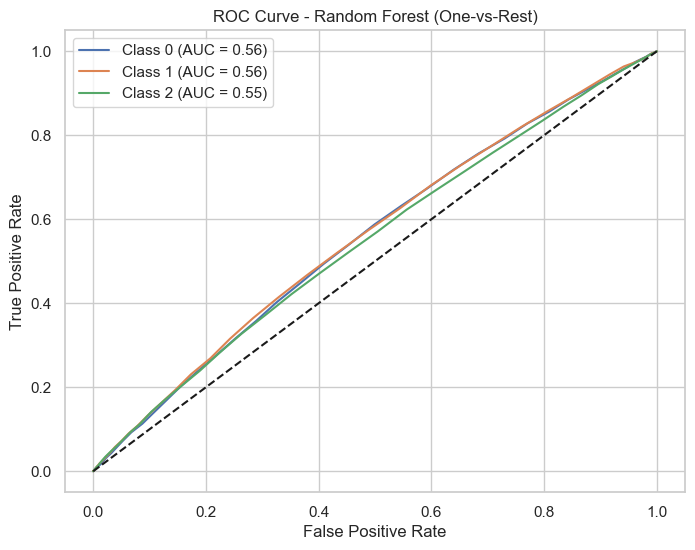

Classification Report - Random Forest:



,precision,recall,f1-score,support
0,0.431,0.550,0.483,15639.000
1,0.298,0.120,0.171,9465.000
2,0.407,0.443,0.424,14896.000
accuracy,0.409,0.409,0.409,0.409
macro avg,0.379,0.371,0.360,40000.000
weighted avg,0.391,0.409,0.388,40000.000


In [45]:
# === Import Visualization Tools ===
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Confusion Matrix ===
plt.figure(figsize=(6, 5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Cancelled', 'Completed', 'NoShow'], yticklabels=['Cancelled', 'Completed', 'NoShow'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# === ROC Curve - One-vs-Rest for Multi-Class ===
# This shows the ROC curve for each class individually.
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr_rf, tpr_rf, _ = roc_curve(y_test == i, y_proba_rf[:, i])
    auc_rf = roc_auc_score(y_test == i, y_proba_rf[:, i])
    plt.plot(fpr_rf, tpr_rf, label=f'Class {i} (AUC = {auc_rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Random Forest (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
# === Classification Report Table ===
print("Classification Report - Random Forest:\n")
display(report_df_rf.round(3))


## XGBoost Classifier

In [47]:
# === Import XGBoost Classifier ===
from xgboost import XGBClassifier

# === Initialize XGBoost Model ===
# - objective='multi:softprob': For multi-class classification with probability outputs
# - eval_metric='mlogloss': Standard for multi-class
# - use_label_encoder=False: Suppresses legacy warning
# - n_estimators=100: Reasonable depth for baseline
# - scale_pos_weight not needed here (SMOTE already applied)
xgb_model = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    random_state=42
)

# === Train on SMOTE-balanced training set ===
xgb_model.fit(X_train_bal, y_train_bal)

# === Predict on test set ===
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)

# === Classification Report ===
from sklearn.metrics import classification_report

report_dict_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_df_xgb = pd.DataFrame(report_dict_xgb).transpose()

# === Macro-Average Metrics ===
macro_f1_xgb = report_dict_xgb['macro avg']['f1-score']
macro_precision_xgb = report_dict_xgb['macro avg']['precision']
macro_recall_xgb = report_dict_xgb['macro avg']['recall']
accuracy_xgb = report_dict_xgb['accuracy']

# === Append to Results Tracker ===
model_results.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'F1 (Macro)': macro_f1_xgb,
    'Precision (Macro)': macro_precision_xgb,
    'Recall (Macro)': macro_recall_xgb
})


/Applications/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:58:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


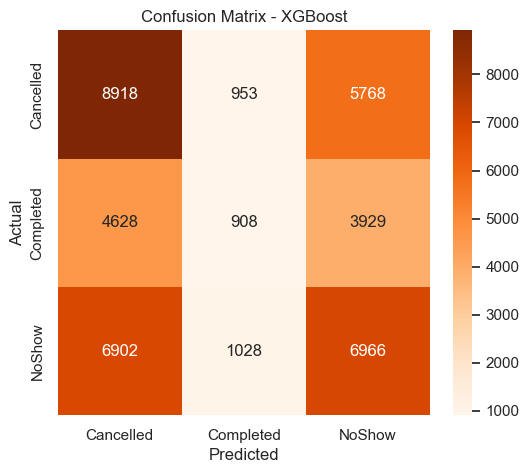

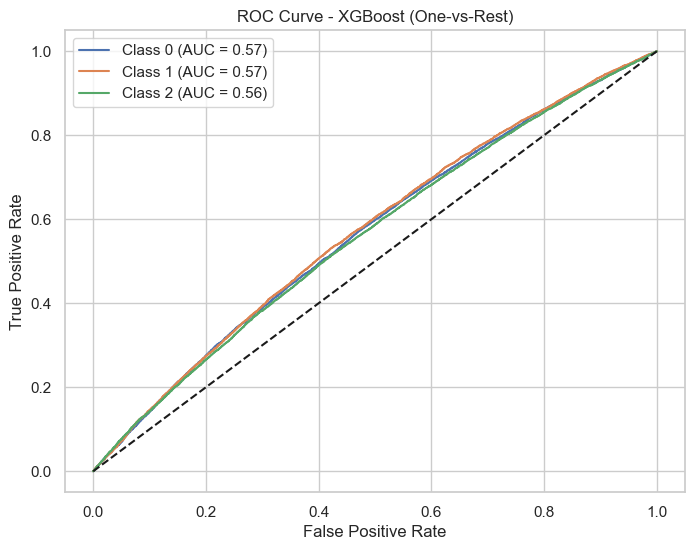

Classification Report - XGBoost:



,precision,recall,f1-score,support
0,0.436,0.570,0.494,15639.00
1,0.314,0.096,0.147,9465.00
2,0.418,0.468,0.441,14896.00
accuracy,0.420,0.420,0.420,0.42
macro avg,0.389,0.378,0.361,40000.00
weighted avg,0.401,0.420,0.392,40000.00


In [48]:
# === Import Plotting Tools ===
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# === Confusion Matrix ===
plt.figure(figsize=(6, 5))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Cancelled', 'Completed', 'NoShow'],
            yticklabels=['Cancelled', 'Completed', 'NoShow'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# === ROC Curve - One-vs-Rest for Multi-Class ===
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test == i, y_proba_xgb[:, i])
    auc_xgb = roc_auc_score(y_test == i, y_proba_xgb[:, i])
    plt.plot(fpr_xgb, tpr_xgb, label=f'Class {i} (AUC = {auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - XGBoost (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
# === Classification Report Table ===
print("Classification Report - XGBoost:\n")
display(report_df_xgb.round(3))


## LightGBM Classifier

In [50]:
# === Import LightGBM Classifier ===
from lightgbm import LGBMClassifier

# === Initialize LightGBM Model ===
# - objective='multiclass': Required for multi-class classification
# - n_estimators=100: Number of boosting iterations
# - class_weight='balanced': Helps model learn under class imbalance
# - random_state=42: For reproducibility
lgb_model = LGBMClassifier(
    objective='multiclass',
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

# === Train on SMOTE-balanced training set ===
lgb_model.fit(X_train_bal, y_train_bal)

# === Predict on test set ===
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)

# === Classification Report ===
from sklearn.metrics import classification_report

report_dict_lgb = classification_report(y_test, y_pred_lgb, output_dict=True)
report_df_lgb = pd.DataFrame(report_dict_lgb).transpose()

# === Macro-Average Metrics ===
macro_f1_lgb = report_dict_lgb['macro avg']['f1-score']
macro_precision_lgb = report_dict_lgb['macro avg']['precision']
macro_recall_lgb = report_dict_lgb['macro avg']['recall']
accuracy_lgb = report_dict_lgb['accuracy']

# === Append to Results Tracker ===
model_results.append({
    'Model': 'LightGBM',
    'Accuracy': accuracy_lgb,
    'F1 (Macro)': macro_f1_lgb,
    'Precision (Macro)': macro_precision_lgb,
    'Recall (Macro)': macro_recall_lgb
})


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3660
[LightGBM] [Info] Number of data points in the train set: 187659, number of used features: 30
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


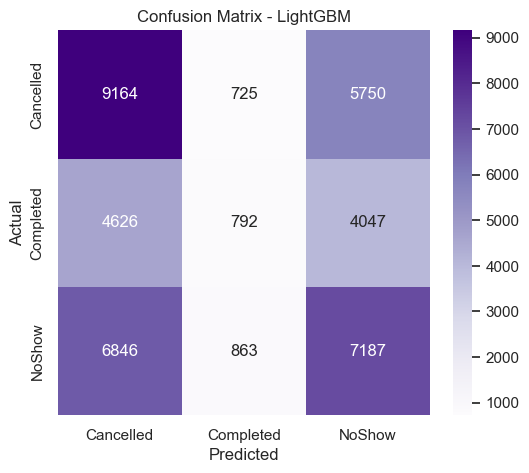

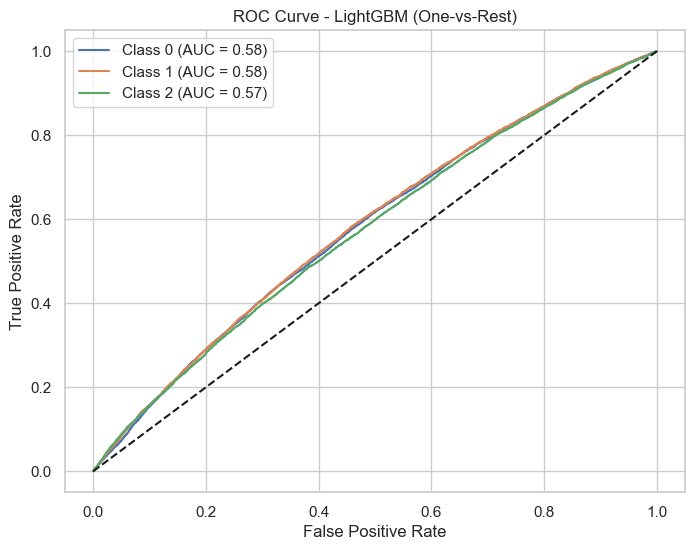

Classification Report - LightGBM:



,precision,recall,f1-score,support
0,0.444,0.586,0.505,15639.000
1,0.333,0.084,0.134,9465.000
2,0.423,0.482,0.451,14896.000
accuracy,0.429,0.429,0.429,0.429
macro avg,0.400,0.384,0.363,40000.000
weighted avg,0.410,0.429,0.397,40000.000


In [51]:
# === Import Plotting Tools ===
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Confusion Matrix ===
plt.figure(figsize=(6, 5))
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Cancelled', 'Completed', 'NoShow'],
            yticklabels=['Cancelled', 'Completed', 'NoShow'])
plt.title('Confusion Matrix - LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# === ROC Curve - One-vs-Rest for Multi-Class ===
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr_lgb, tpr_lgb, _ = roc_curve(y_test == i, y_proba_lgb[:, i])
    auc_lgb = roc_auc_score(y_test == i, y_proba_lgb[:, i])
    plt.plot(fpr_lgb, tpr_lgb, label=f'Class {i} (AUC = {auc_lgb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - LightGBM (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
# === Classification Report Table ===
print("Classification Report - LightGBM:\n")
display(report_df_lgb.round(3))


## CatBoost Classifier

In [53]:
# === Import CatBoost Classifier ===
from catboost import CatBoostClassifier

# === Initialize CatBoost Model ===
# - loss_function='MultiClass': Enables multi-class classification
# - iterations=100: Number of boosting iterations
# - verbose=0: Suppress per-iteration output
# - random_state=42: For reproducibility
cat_model = CatBoostClassifier(
    loss_function='MultiClass',
    iterations=100,
    random_state=42,
    verbose=0
)

# === Train on SMOTE-balanced training set ===
# CatBoost can also accept categorical feature indices, but we've encoded them already
cat_model.fit(X_train_bal, y_train_bal)

# === Predict on test set ===
y_pred_cat = cat_model.predict(X_test)
y_pred_cat = y_pred_cat.flatten()  # Converts from (n,1) to (n,) for compatibility
y_proba_cat = cat_model.predict_proba(X_test)

# === Classification Report ===
from sklearn.metrics import classification_report

report_dict_cat = classification_report(y_test, y_pred_cat, output_dict=True)
report_df_cat = pd.DataFrame(report_dict_cat).transpose()

# === Macro-Average Metrics ===
macro_f1_cat = report_dict_cat['macro avg']['f1-score']
macro_precision_cat = report_dict_cat['macro avg']['precision']
macro_recall_cat = report_dict_cat['macro avg']['recall']
accuracy_cat = report_dict_cat['accuracy']

# === Append to Results Tracker ===
model_results.append({
    'Model': 'CatBoost',
    'Accuracy': accuracy_cat,
    'F1 (Macro)': macro_f1_cat,
    'Precision (Macro)': macro_precision_cat,
    'Recall (Macro)': macro_recall_cat
})


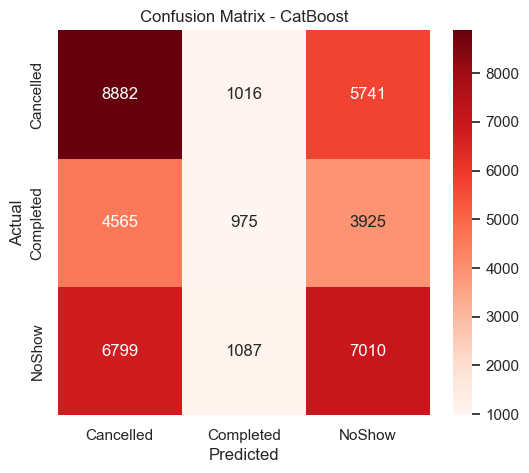

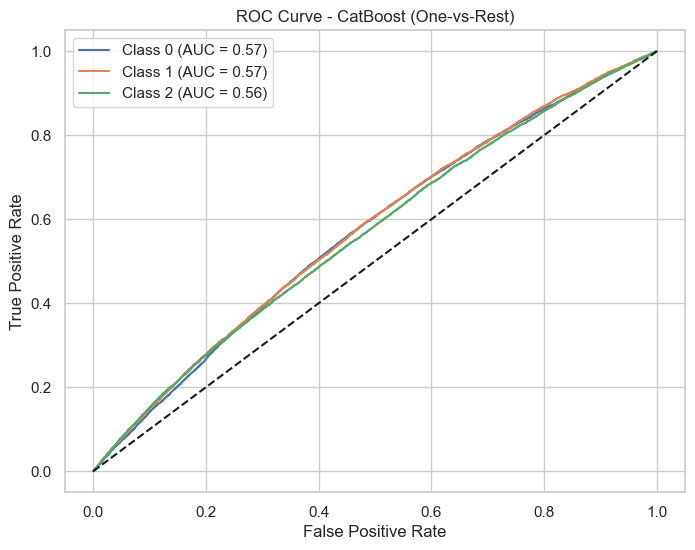

Classification Report - CatBoost:



,precision,recall,f1-score,support
0,0.439,0.568,0.495,15639.000
1,0.317,0.103,0.155,9465.000
2,0.420,0.471,0.444,14896.000
accuracy,0.422,0.422,0.422,0.422
macro avg,0.392,0.381,0.365,40000.000
weighted avg,0.403,0.422,0.396,40000.000


In [54]:
# === Import Tools for Evaluation ===
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Confusion Matrix ===
plt.figure(figsize=(6, 5))
cm_cat = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Cancelled', 'Completed', 'NoShow'],
            yticklabels=['Cancelled', 'Completed', 'NoShow'])
plt.title('Confusion Matrix - CatBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# === ROC Curve - One-vs-Rest for Multi-Class ===
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr_cat, tpr_cat, _ = roc_curve(y_test == i, y_proba_cat[:, i])
    auc_cat = roc_auc_score(y_test == i, y_proba_cat[:, i])
    plt.plot(fpr_cat, tpr_cat, label=f'Class {i} (AUC = {auc_cat:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - CatBoost (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
# === Classification Report Table ===
print("Classification Report - CatBoost:\n")
display(report_df_cat.round(3))


## Comparing the Models

/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_29871/2112367125.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=results_df.sort_values(by=metric, ascending=False), palette='viridis')


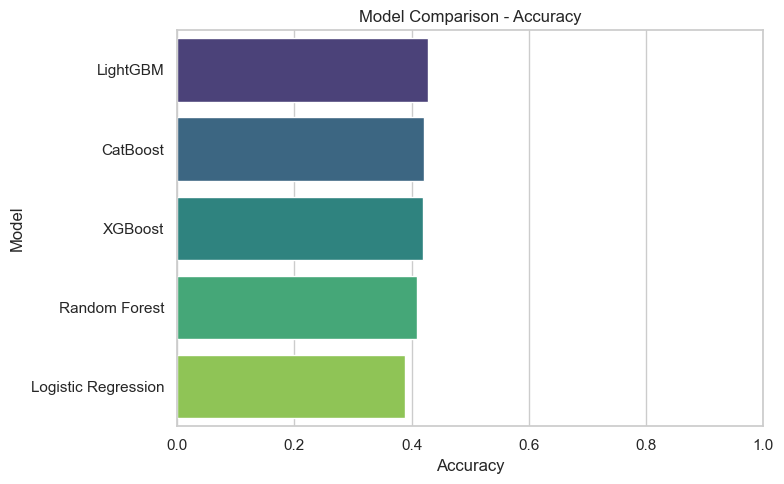

/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_29871/2112367125.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=results_df.sort_values(by=metric, ascending=False), palette='viridis')


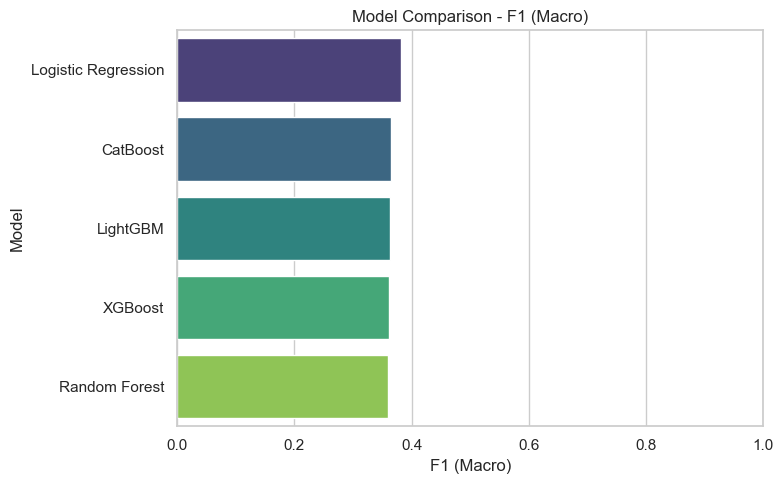

/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_29871/2112367125.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=results_df.sort_values(by=metric, ascending=False), palette='viridis')


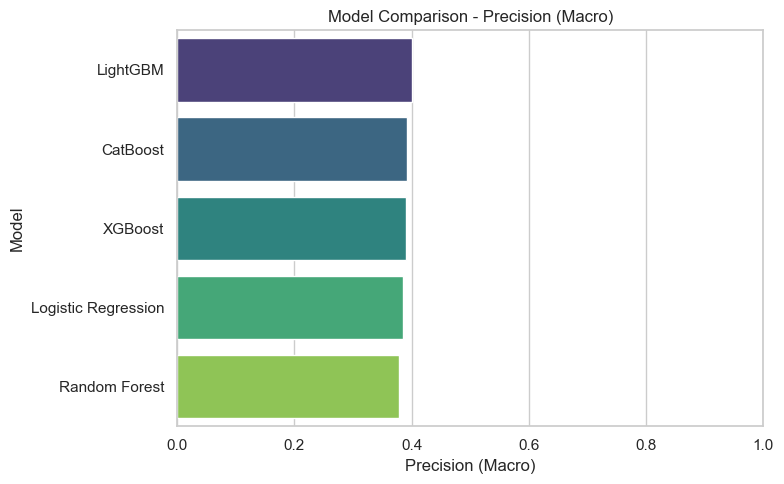

/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_29871/2112367125.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=results_df.sort_values(by=metric, ascending=False), palette='viridis')


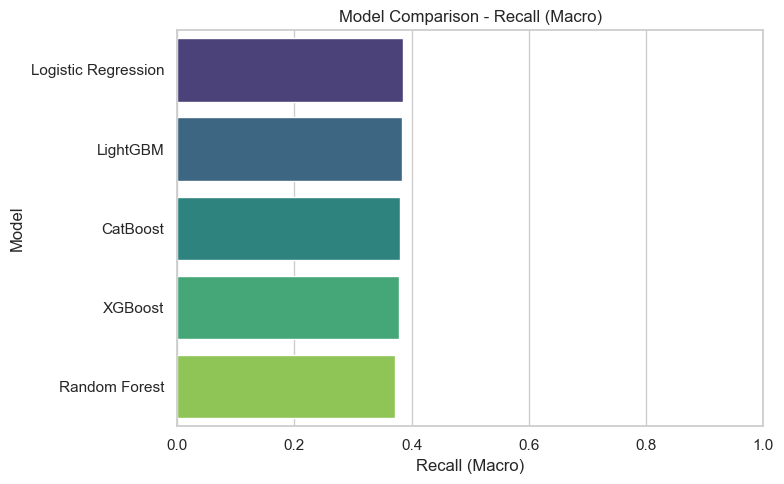

In [56]:
# === Convert Results to DataFrame ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame(model_results)

# === Set Style for Consistent Aesthetic ===
sns.set(style='whitegrid')
metrics = ['Accuracy', 'F1 (Macro)', 'Precision (Macro)', 'Recall (Macro)']

# === Plot Each Metric in Separate Bar Chart ===
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=metric, y='Model', data=results_df.sort_values(by=metric, ascending=False), palette='viridis')
    plt.title(f'Model Comparison - {metric}')
    plt.xlabel(metric)
    plt.ylabel('Model')
    plt.xlim(0, 1)  # All metrics range from 0 to 1
    plt.tight_layout()
    plt.show()


In [57]:
# === Round Metrics for Clarity ===
summary_table = results_df.copy()
summary_table[['Accuracy', 'F1 (Macro)', 'Precision (Macro)', 'Recall (Macro)']] = summary_table[
    ['Accuracy', 'F1 (Macro)', 'Precision (Macro)', 'Recall (Macro)']
].round(3)

# === Sort by F1 Macro Score (or any metric you prefer) ===
summary_table = summary_table.sort_values(by='F1 (Macro)', ascending=False).reset_index(drop=True)

# === Display the Table ===
print("Model Performance Summary:\n")
display(summary_table)

Model Performance Summary:



,Model,Accuracy,F1 (Macro),Precision (Macro),Recall (Macro)
0,Logistic Regression,0.389,0.382,0.385,0.386
1,CatBoost,0.422,0.365,0.392,0.381
2,LightGBM,0.429,0.363,0.400,0.384
3,XGBoost,0.420,0.361,0.389,0.378
4,Random Forest,0.409,0.360,0.379,0.371


## Hyperparameter Tuning for Cat Boost

In [59]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# === Define F1 Macro Scorer ===
f1_macro_scorer = make_scorer(f1_score, average='macro')

# === Define Parameter Grid for Tuning ===
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': [100, 200, 300],
    'random_strength': [0.5, 1.0, 1.5]
}

# === Initialize Base Model ===
cat_base = CatBoostClassifier(loss_function='MultiClass', verbose=0, random_state=42)

# === RandomizedSearch ===
cat_search = RandomizedSearchCV(
    estimator=cat_base,
    param_distributions=param_dist,
    n_iter=20,  # Fast tuning: 20 combinations
    scoring=f1_macro_scorer,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# === Fit on Balanced Training Set ===
cat_search.fit(X_train_bal, y_train_bal)

# === Best Model ===
best_cat = cat_search.best_estimator_
print("Best CatBoost Params:", cat_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Applications/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best CatBoost Params: {'random_strength': 1.5, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 100, 'depth': 8}


In [60]:
# === Predict on Test Set ===
y_pred_cat_tuned = best_cat.predict(X_test)
y_pred_cat_tuned = y_pred_cat_tuned.flatten()  # CatBoost returns shape (n, 1)
y_proba_cat_tuned = best_cat.predict_proba(X_test)

# === Classification Report ===
from sklearn.metrics import classification_report

report_dict_cat_tuned = classification_report(y_test, y_pred_cat_tuned, output_dict=True)
report_df_cat_tuned = pd.DataFrame(report_dict_cat_tuned).transpose()

# === Macro-Average Metrics ===
macro_f1_cat_tuned = report_dict_cat_tuned['macro avg']['f1-score']
macro_precision_cat_tuned = report_dict_cat_tuned['macro avg']['precision']
macro_recall_cat_tuned = report_dict_cat_tuned['macro avg']['recall']
accuracy_cat_tuned = report_dict_cat_tuned['accuracy']

# === Append to Results Tracker ===
model_results.append({
    'Model': 'CatBoost (Tuned)',
    'Accuracy': accuracy_cat_tuned,
    'F1 (Macro)': macro_f1_cat_tuned,
    'Precision (Macro)': macro_precision_cat_tuned,
    'Recall (Macro)': macro_recall_cat_tuned  # <-- Fixed line
})



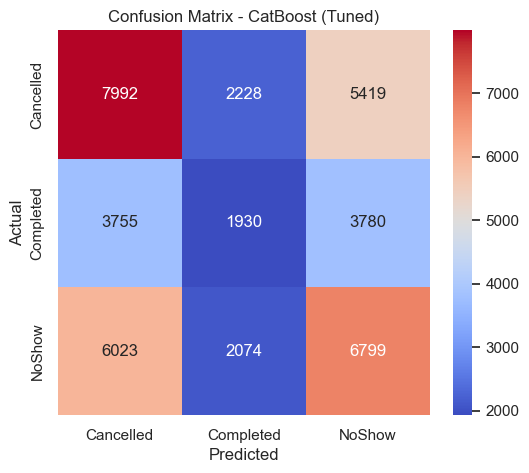

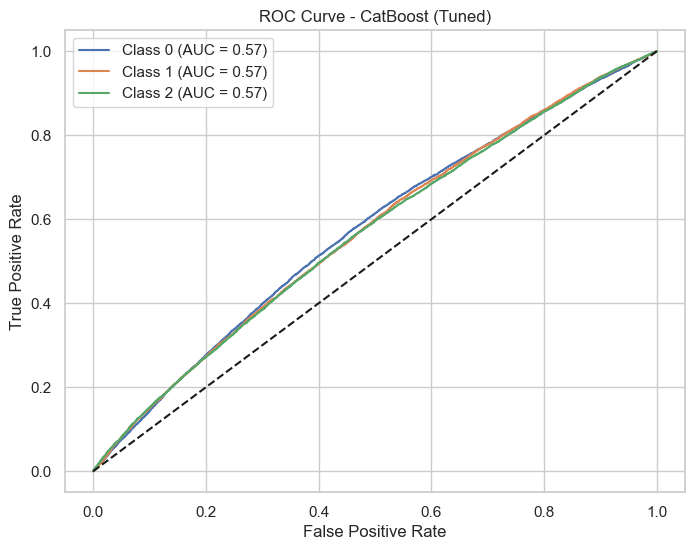

Classification Report - CatBoost (Tuned):



,precision,recall,f1-score,support
0,0.450,0.511,0.478,15639.000
1,0.310,0.204,0.246,9465.000
2,0.425,0.456,0.440,14896.000
accuracy,0.418,0.418,0.418,0.418
macro avg,0.395,0.390,0.388,40000.000
weighted avg,0.407,0.418,0.409,40000.000


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# === Confusion Matrix ===
plt.figure(figsize=(6, 5))
cm_cat_tuned = confusion_matrix(y_test, y_pred_cat_tuned)
sns.heatmap(cm_cat_tuned, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Cancelled', 'Completed', 'NoShow'],
            yticklabels=['Cancelled', 'Completed', 'NoShow'])
plt.title('Confusion Matrix - CatBoost (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
from sklearn.metrics import roc_curve, roc_auc_score

# === ROC Curve per Class ===
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba_cat_tuned[:, i])
    auc = roc_auc_score(y_test == i, y_proba_cat_tuned[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - CatBoost (Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
print("Classification Report - CatBoost (Tuned):\n")
display(report_df_cat_tuned.round(3))


##  Hyperparameter Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# === Define Macro F1 as Scoring Metric ===
f1_macro_scorer = make_scorer(f1_score, average='macro')

# === Parameter Distribution for Tuning ===
param_dist_lr = {
    'C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],
    'penalty': ['l2', 'elasticnet'],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],  # Only applies to elasticnet
}

# === Initialize Base Model ===
logreg_base = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# === Run RandomizedSearchCV ===
logreg_search = RandomizedSearchCV(
    estimator=logreg_base,
    param_distributions=param_dist_lr,
    n_iter=20,
    scoring=f1_macro_scorer,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# === Fit on Scaled, Balanced Training Data ===
logreg_search.fit(X_train_scaled, y_train_bal)

# === Best Model ===
best_logreg = logreg_search.best_estimator_
print("Best Logistic Regression Params:", logreg_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warni

Best Logistic Regression Params: {'penalty': 'l2', 'l1_ratio': 0.25, 'C': 0.1}


In [64]:
# === Predict on Test Set ===
y_pred_lr_tuned = best_logreg.predict(X_test_scaled)
y_proba_lr_tuned = best_logreg.predict_proba(X_test_scaled)

# === Classification Report ===
from sklearn.metrics import classification_report

report_dict_lr_tuned = classification_report(y_test, y_pred_lr_tuned, output_dict=True)
report_df_lr_tuned = pd.DataFrame(report_dict_lr_tuned).transpose()

# === Macro-Average Metrics ===
macro_f1_lr_tuned = report_dict_lr_tuned['macro avg']['f1-score']
macro_precision_lr_tuned = report_dict_lr_tuned['macro avg']['precision']
macro_recall_lr_tuned = report_dict_lr_tuned['macro avg']['recall']
accuracy_lr_tuned = report_dict_lr_tuned['accuracy']

# === Append to Results Tracker ===
model_results.append({
    'Model': 'Logistic Regression (Tuned)',
    'Accuracy': accuracy_lr_tuned,
    'F1 (Macro)': macro_f1_lr_tuned,
    'Precision (Macro)': macro_precision_lr_tuned,
    'Recall (Macro)': macro_recall_lr_tuned
})


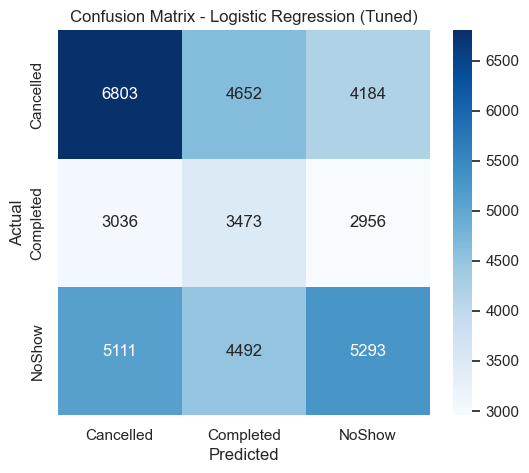

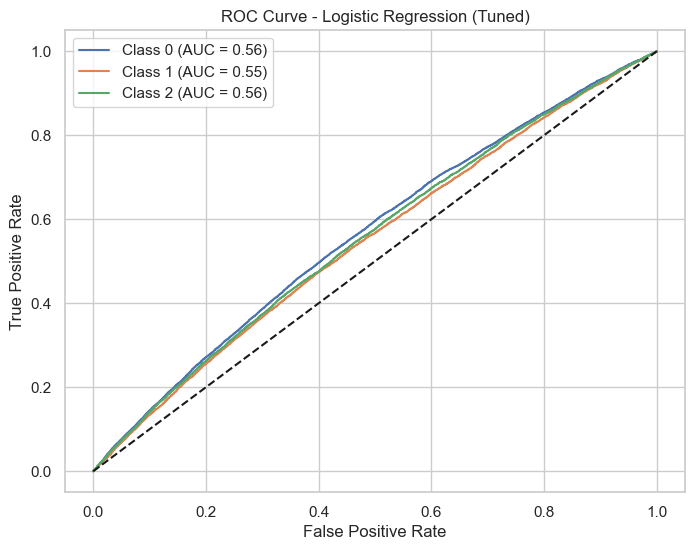

Classification Report - Logistic Regression (Tuned):



,precision,recall,f1-score,support
0,0.455,0.435,0.445,15639.000
1,0.275,0.367,0.315,9465.000
2,0.426,0.355,0.387,14896.000
accuracy,0.389,0.389,0.389,0.389
macro avg,0.385,0.386,0.382,40000.000
weighted avg,0.402,0.389,0.393,40000.000


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# === Confusion Matrix ===
plt.figure(figsize=(6, 5))
cm_lr_tuned = confusion_matrix(y_test, y_pred_lr_tuned)
sns.heatmap(cm_lr_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cancelled', 'Completed', 'NoShow'],
            yticklabels=['Cancelled', 'Completed', 'NoShow'])
plt.title('Confusion Matrix - Logistic Regression (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
from sklearn.metrics import roc_curve, roc_auc_score

# === ROC Curve per Class ===
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr_lr, tpr_lr, _ = roc_curve(y_test == i, y_proba_lr_tuned[:, i])
    auc_lr = roc_auc_score(y_test == i, y_proba_lr_tuned[:, i])
    plt.plot(fpr_lr, tpr_lr, label=f'Class {i} (AUC = {auc_lr:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Logistic Regression (Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
print("Classification Report - Logistic Regression (Tuned):\n")
display(report_df_lr_tuned.round(3))


## Top Predictors for target class

In [67]:
# === Extract Feature Names and Importances ===
feature_importances = pd.Series(best_cat.feature_importances_, index=X.columns)

# === Sort from Most Important to Least ===
feature_importances = feature_importances.sort_values(ascending=False)

# === Display Top N Features ===
top_10 = feature_importances.head(10)
print("Top 10 Most Predictive Features (Overall):")
display(top_10)


Top 10 Most Predictive Features (Overall):


num_children       20.892721
num_adults         19.678641
discount_pct       12.469324
weekend_flag       10.726615
lead_time_days      7.885634
channel             6.749510
checkin_weekday     6.584964
discount_level      5.448821
total_guests        2.963759
meal_plan           1.462524
dtype: float64

/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_29871/1840163575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')


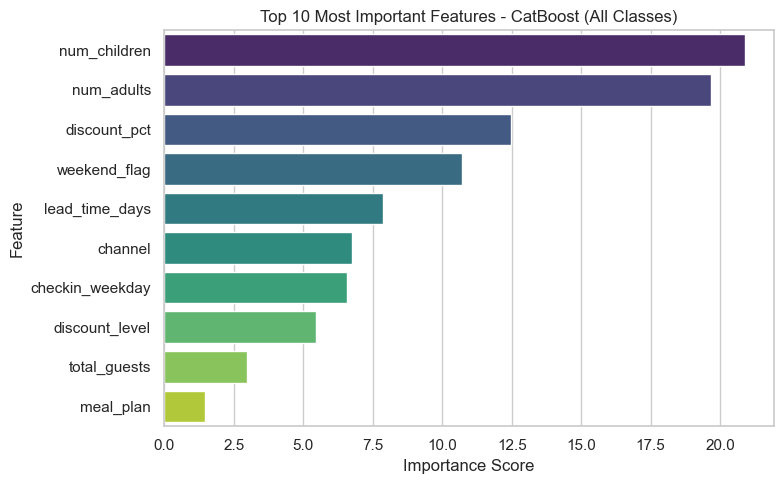

In [68]:
# === Plot Top 10 Features ===
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.title('Top 10 Most Important Features - CatBoost (All Classes)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



## Top Predictors for Cancellation

In [70]:
# 1 = Cancelled, 0 = Completed or NoShow
df['is_cancelled'] = (df['target_class'] == 'Cancelled').astype(int)
X_bin = df.drop(columns=[
    'booking_id', 'booking_datetime', 'checkin_date',
    'target_class', 'target_value', 'target_class_encoded', 'is_cancelled'
])
y_bin = df['is_cancelled']
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Stratified split
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_bin, y_bin, test_size=0.2, stratify=y_bin, random_state=42
)

# Apply SMOTE
smote_bin = SMOTE(random_state=42)
X_train_bin_bal, y_train_bin_bal = smote_bin.fit_resample(X_train_bin, y_train_bin)
from catboost import CatBoostClassifier

cat_bin = CatBoostClassifier(
    loss_function='Logloss',  # binary log loss
    iterations=200,
    learning_rate=0.05,
    depth=6,
    random_state=42,
    verbose=0
)

cat_bin.fit(X_train_bin_bal, y_train_bin_bal)
# Feature importance
import pandas as pd

feature_importances_bin = pd.Series(cat_bin.feature_importances_, index=X_bin.columns)
feature_importances_bin = feature_importances_bin.sort_values(ascending=False)
top_10_bin = feature_importances_bin.head(10)

print("Top 10 Predictors of Cancellations (Binary Model):")
display(top_10_bin)


Top 10 Predictors of Cancellations (Binary Model):


discount_pct      26.950743
num_adults        19.609346
num_children      16.043572
seasonal_index     8.361683
discount_level     5.799118
total_guests       5.048295
month              4.374477
age_group          3.548793
customer_age       2.795809
weekend_flag       2.102059
dtype: float64

/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_29871/1412472012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_bin.values, y=top_10_bin.index, palette='rocket')


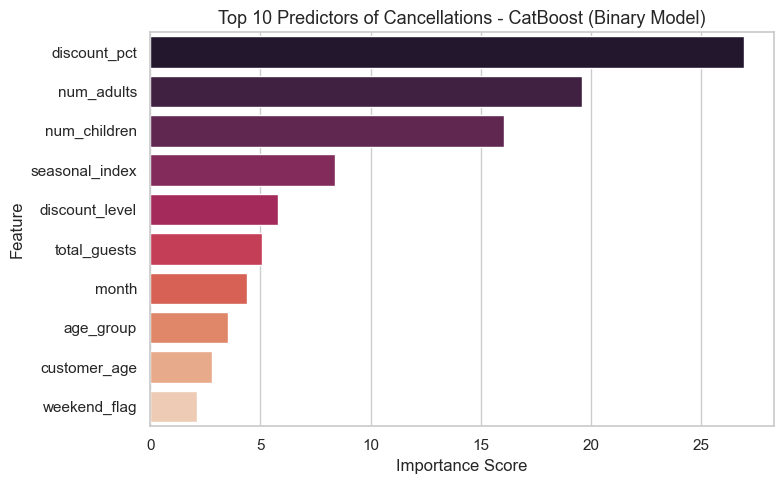

In [71]:
# === Plot Top 10 Features for Cancellation (Binary) ===
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=top_10_bin.values, y=top_10_bin.index, palette='rocket')
plt.title('Top 10 Predictors of Cancellations - CatBoost (Binary Model)', fontsize=13)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [72]:
import pandas as pd

# Convert list of dictionaries to DataFrame
results_df = pd.DataFrame(model_results)

# Round for clarity
results_df[['Accuracy', 'F1 (Macro)', 'Precision (Macro)', 'Recall (Macro)']] = results_df[
    ['Accuracy', 'F1 (Macro)', 'Precision (Macro)', 'Recall (Macro)']
].round(3)

# Sort by F1 (Macro) — main metric
results_df_sorted = results_df.sort_values(by='F1 (Macro)', ascending=False).reset_index(drop=True)

# Display as table
print("📊 Model Performance Summary:")
display(results_df_sorted)


📊 Model Performance Summary:


,Model,Accuracy,F1 (Macro),Precision (Macro),Recall (Macro)
0,CatBoost (Tuned),0.418,0.388,0.395,0.390
1,Logistic Regression,0.389,0.382,0.385,0.386
2,Logistic Regression (Tuned),0.389,0.382,0.385,0.386
3,CatBoost,0.422,0.365,0.392,0.381
4,LightGBM,0.429,0.363,0.400,0.384
5,XGBoost,0.420,0.361,0.389,0.378
6,Random Forest,0.409,0.360,0.379,0.371


/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_29871/3772560094.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=results_df_sorted, palette='viridis')


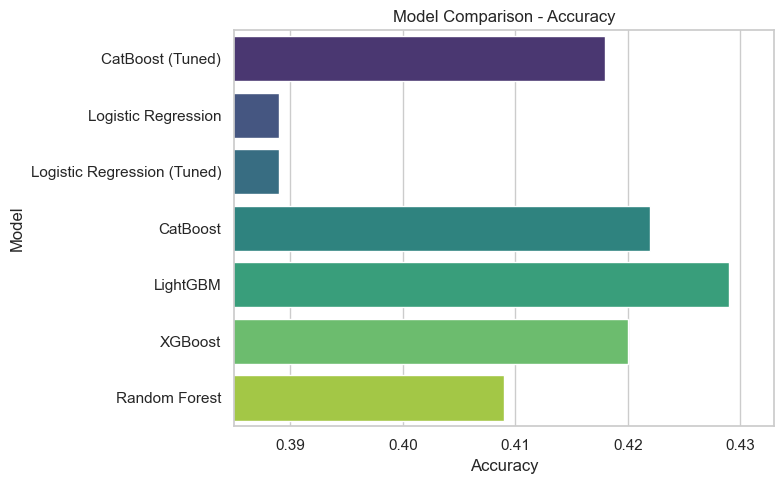

/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_29871/3772560094.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=results_df_sorted, palette='viridis')


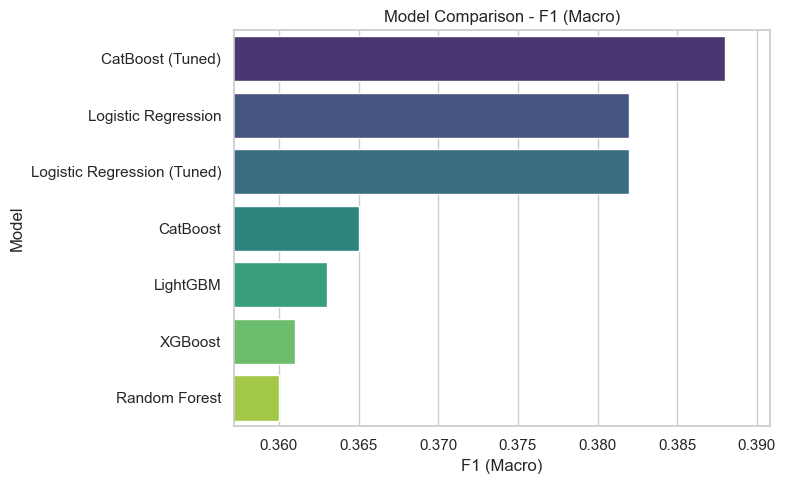

/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_29871/3772560094.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=results_df_sorted, palette='viridis')


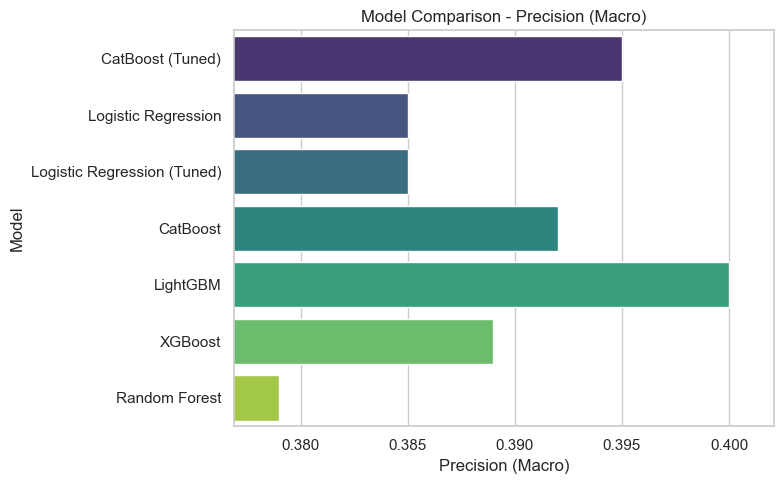

/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_29871/3772560094.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=results_df_sorted, palette='viridis')


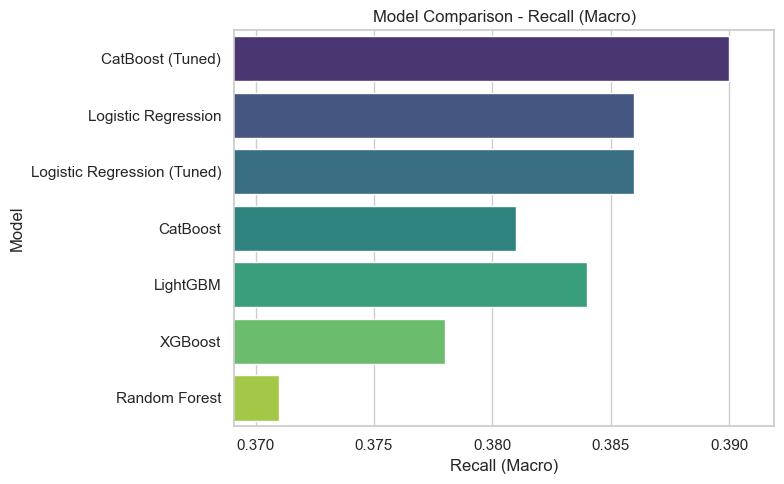

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')
metrics = ['Accuracy', 'F1 (Macro)', 'Precision (Macro)', 'Recall (Macro)']

# Barplot for each metric with dynamic scaling
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=metric, y='Model', data=results_df_sorted, palette='viridis')
    plt.title(f'Model Comparison - {metric}')
    plt.xlabel(metric)
    plt.ylabel('Model')

    # Set x-axis range dynamically with a small margin
    min_val = results_df_sorted[metric].min()
    max_val = results_df_sorted[metric].max()
    margin = (max_val - min_val) * 0.1  # 10% padding
    plt.xlim(min_val - margin, max_val + margin)

    plt.tight_layout()
    plt.show()
